## Assignment:

Beat the performance of my Lasso regression by **using different feature engineering steps ONLY!!**.

The performance of my current model, as shown in this notebook is:

- test mse: 1063016789.3316755
- test rmse: 32603.938248801718
- test r2: 0.8453144708738004

To beat my model you will need a test r2 bigger than 0.85 and a rmse smaller than 32603.


=====================================================================================================


### Conditions:

- You MUST NOT change the hyperparameters of the Lasso.
- You MUST use the same seeds in Lasso and train_test_split as I show in this notebook (random_state)
- You MUST use all the features of the dataset (except Id) - you MUST NOT select features


=====================================================================================================


### If you beat my model:

Make a pull request with your notebook to this github repo:
https://github.com/solegalli/udemy-feml-challenge

And add your notebook to the folder:

-StudentsSolutions_v1.0.0

### How to make the PR

1) fork the repo:

Go to https://github.com/solegalli/udemy-feml-challenge, and click on the **fork** button at the top-right

2) clone your forked repo into your local computer:

- Go to www.github.com/yourusername/udemy-feml-challenge
- Click the green button that says clone or download
- copy the url that opens up
- power up a git console
- type: git clone (paste the url you copied from github)
- done

3) Make a copy of the jupyter notebook and add your name:

- Open up the Jupyter notebook called 13-Assignement.ipynb
- Click the "File" button at the top-right and then click "Make a copy"
- **Work your solution in the Copy** and not in the original assignment (otherwise there will be conflicts when making the PR)
- Change the name of the copy of the notebook to: 13-Assignement_yourname.ipynb
- Move the notebook to the folder **StudentsSolutions_v1.0.0**
- done

When you finish, just commit the new notebook to your fork and then make a PR to my repo.

- git add StudentsSolutions_v1.0.0/13-Assignement_yourname.ipynb
- git commit -m "your commit message"
- git push origin master or git push origin yourfeaturebranch
- go to your repo and make a pull request.


## But i have a notebook ready and I haven't cloned the repo yet, how can I make the PR?

If you worked in the copy you downloaded from Udemy before forking and cloning this repo, then follow this steps:

1) fork the repo:

Go to https://github.com/solegalli/udemy-feml-challenge, and click on the fork button at the top-right

2) clone your forked repo into your local computer:

Go to www.github.com/yourusername/udemy-feml-challenge

- Click the green button that says clone or download
- Copy the url that opens up
- Power up a git console
- Type: git clone (paste the url you copied from github)
- Done

3) Rename your solution as follows and copy it into your cloned repo:

- Rename your solution notebook to: 13-Assignement_yourname.ipynb
- Copy this file into the cloned repo, inside the folder **StudentsSolutions_v1.0.0**
- Done

When you finish, just commit the new notebook to your fork and then make a PR to my repo

- git add StudentsSolutions_v1.0.0/13-Assignement_yourname.ipynb
- git commit -m "your commit message"
- git push origin master or git push origin yourfeaturebranch
- go to your repo and make a pull request.

**Good luck!!**

In [1]:
## House Prices dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import scipy.stats as stats

# for the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# for feature engineering
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, power_transform
from feature_engine import imputation as mdi
from feature_engine import discretisation as dsc
from feature_engine import encoding as ce
from feature_engine import transformation as tr
from feature_engine import outliers as out

In [3]:
### Load Datasets

In [4]:
# load dataset

data = pd.read_csv('../../feature-engineering-for-machine-learning/houseprice.csv')

In [5]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


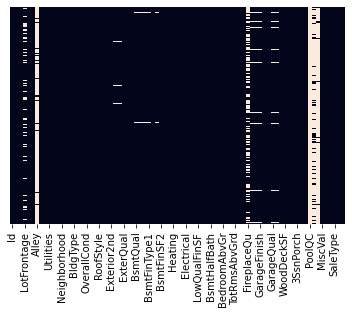

In [6]:
sn.heatmap(data.isnull(), yticklabels=False, cbar=False);

In [7]:
sumnans = data.isna().sum()
nonzero_sumnans = sumnans[sumnans>0]
df_nans = pd.DataFrame({"NaNcount": nonzero_sumnans,
                        "NaNfrac" : nonzero_sumnans/data.shape[0],
                        "type": data[nonzero_sumnans.index.values].dtypes})
df_nans.sort_values("NaNcount", ascending = False)

,NaNcount,NaNfrac,type
PoolQC,1453,0.995205,object
MiscFeature,1406,0.963014,object
Alley,1369,0.937671,object
Fence,1179,0.807534,object
FireplaceQu,690,0.472603,object
LotFrontage,259,0.177397,float64
GarageType,81,0.055479,object
GarageYrBlt,81,0.055479,float64
GarageFinish,81,0.055479,object
GarageQual,81,0.055479,object


In [8]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 5))
           
    # histogram
    plt.subplot(1, 3, 1)
    sn.histplot(df[variable], kde=True)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable].dropna(), dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sn.boxplot(y=df[variable])
    plt.title('Boxplot')
    
    
    plt.tight_layout()

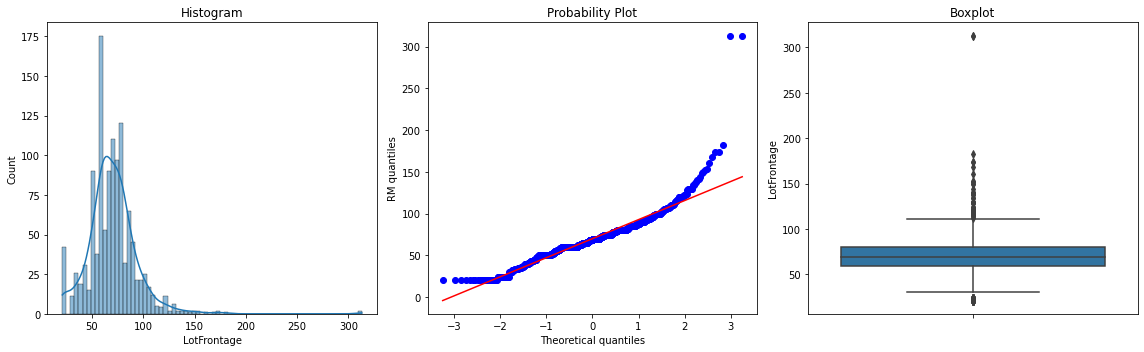

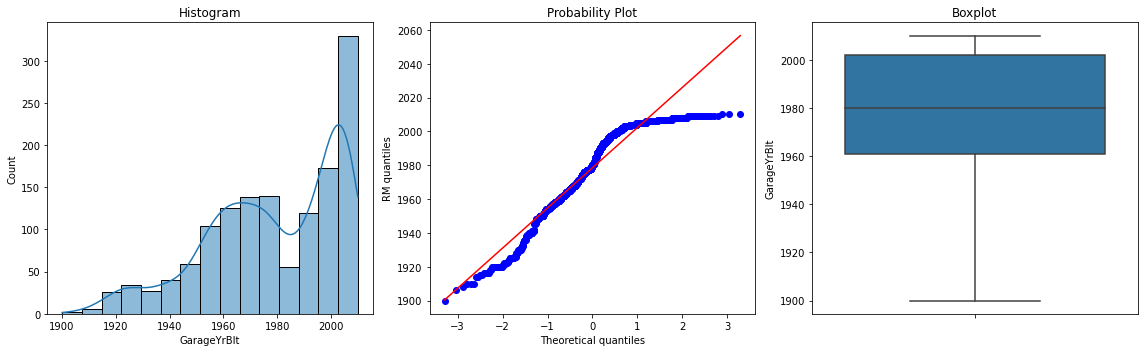

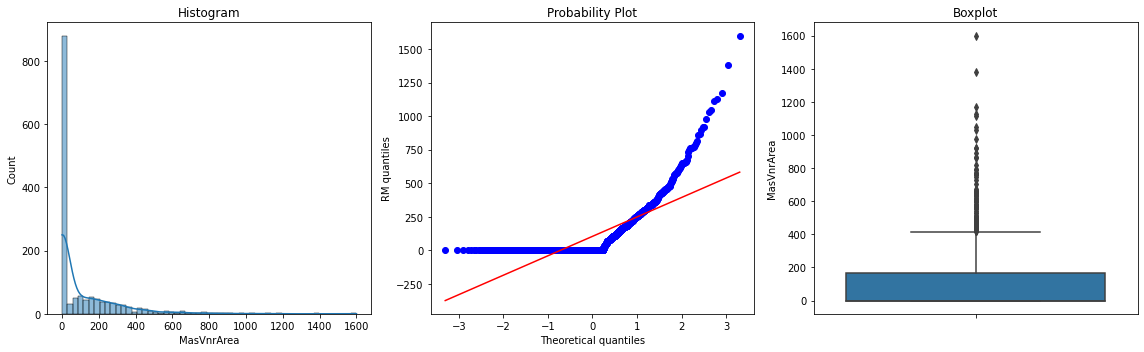

In [9]:
for var in ["LotFrontage", "GarageYrBlt", "MasVnrArea"]:
    diagnostic_plots(data, var)

In [10]:
def avg_target_grouped_by_missingness(data, var, target = "SalePrice"):
    return pd.DataFrame(
        [data[data[var].isna()][target].mean(),
         data[data[var].notna()][target].mean()],
        index = ["{} missing".format(var), "{} not missing".format(var)],
        columns = [target]
    ).round()

In [11]:
avg_target_grouped_by_missingness(data, "LotFrontage")

,SalePrice
LotFrontage missing,181620.0
LotFrontage not missing,180770.0


In [12]:
avg_target_grouped_by_missingness(data, "GarageYrBlt")

,SalePrice
GarageYrBlt missing,103317.0
GarageYrBlt not missing,185480.0


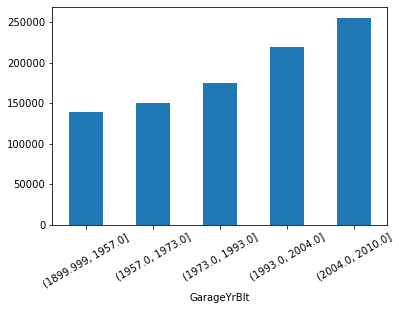

In [13]:
data.groupby(pd.qcut(data.GarageYrBlt,5)).SalePrice.mean().plot.bar(rot=30);

#### Imputation strategies for numerical features:

- LotFrontage: random (likely MCAR, lots of missing data)
- GarageYrBlt: end of tail imputation (left), add missing indicator (MAR, absence of garage decreases value)
- MasVnrArea:  median (kind of irrelevant, very little data is missing)

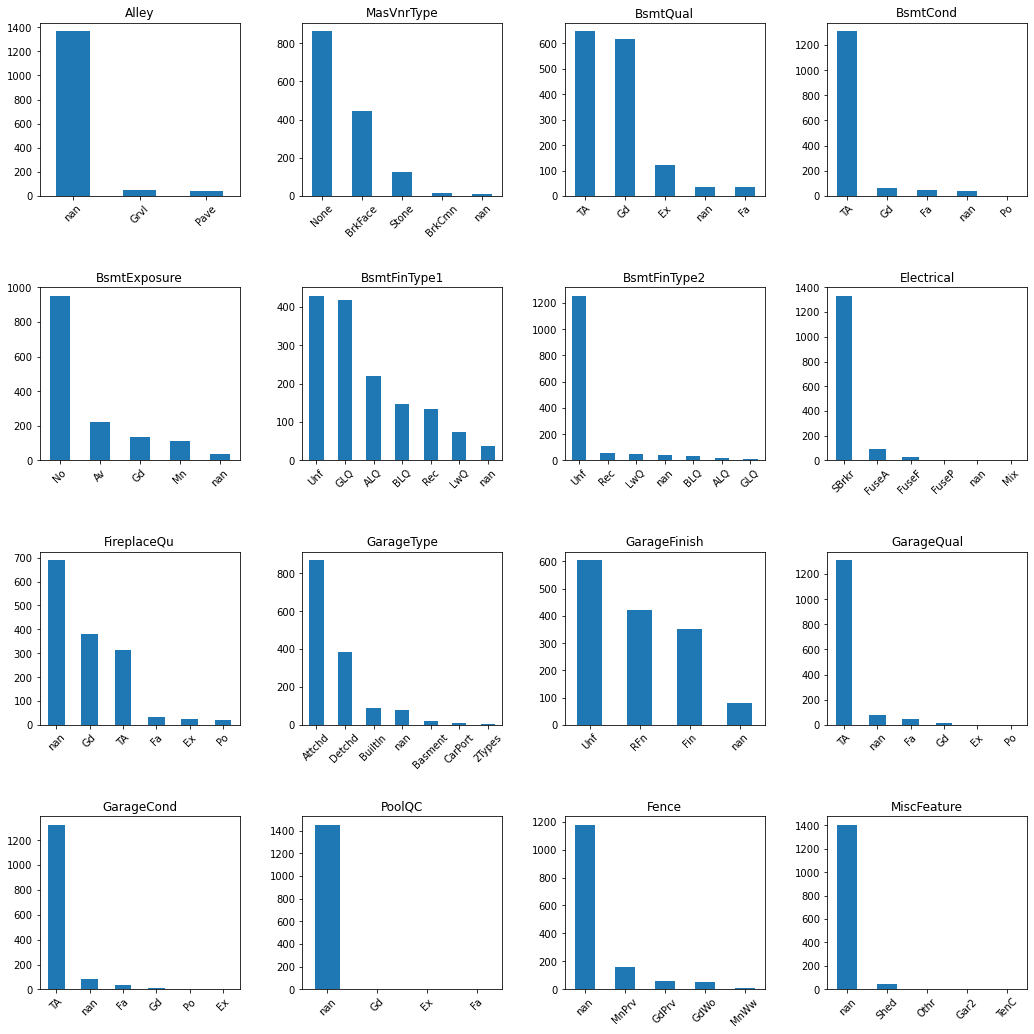

In [14]:
plt.figure(figsize=(15,15))
for i,var in enumerate(df_nans[df_nans.type=='O'].index.values):
    plt.subplot(4,4,i+1)
    plt.title(var)
    data[var].value_counts(dropna=False).sort_values(ascending=False).plot.bar(rot=45)
plt.tight_layout(pad = 3)

In [15]:
avg_target_grouped_by_missingness(data, "Alley")

,SalePrice
Alley missing,183452.0
Alley not missing,142846.0


In [16]:
avg_target_grouped_by_missingness(data, "BsmtQual")

,SalePrice
BsmtQual missing,105653.0
BsmtQual not missing,182878.0


In [17]:
avg_target_grouped_by_missingness(data, "MiscFeature")

,SalePrice
MiscFeature missing,182046.0
MiscFeature not missing,151624.0


In [18]:
avg_target_grouped_by_missingness(data, "Fence")

,SalePrice
Fence missing,187597.0
Fence not missing,152912.0


In [19]:
avg_target_grouped_by_missingness(data, "GarageQual")

,SalePrice
GarageQual missing,103317.0
GarageQual not missing,185480.0


#### Imputation strategy for categorical features

- Alley:       too many missing data, would ideally drop the feature. Frequent imp
- Bsmt**:      add missing indicator (NaN == absence of basement)
- MiscFeature: freq imp
- Electrical:  frequent category (MCAR, only one row missing, irrelevant)
- Fence:       add missing indicator (NaN == absence of Fence)
- PoolQC:      too many missing data, would ideally drop the feature..
- Garage**:    add missing indicator (NaN == absence of garage)
- MasVnrType:  freq (NaN == absence of masonry veneer, very few data missing, irrelevant)

In [20]:
# make lists of variable types

categorical = [var for var in data.columns if data[var].dtype == 'O']

year_vars = [var for var in data.columns if 'Yr' in var or 'Year' in var]

discrete = [
    var for var in data.columns if data[var].dtype != 'O'
    and len(data[var].unique()) < 20 and var not in year_vars
]

numerical = [
    var for var in data.columns if data[var].dtype != 'O'
    if var not in discrete and var not in ['Id', 'SalePrice']
    and var not in year_vars
]

print('There are {} continuous variables'.format(len(numerical)))
print('There are {} discrete variables'.format(len(discrete)))
print('There are {} temporal variables'.format(len(year_vars)))
print('There are {} categorical variables'.format(len(categorical)))

There are 18 continuous variables
There are 14 discrete variables
There are 4 temporal variables
There are 43 categorical variables


In [21]:
discrete.remove('PoolArea')
numerical.append('PoolArea')

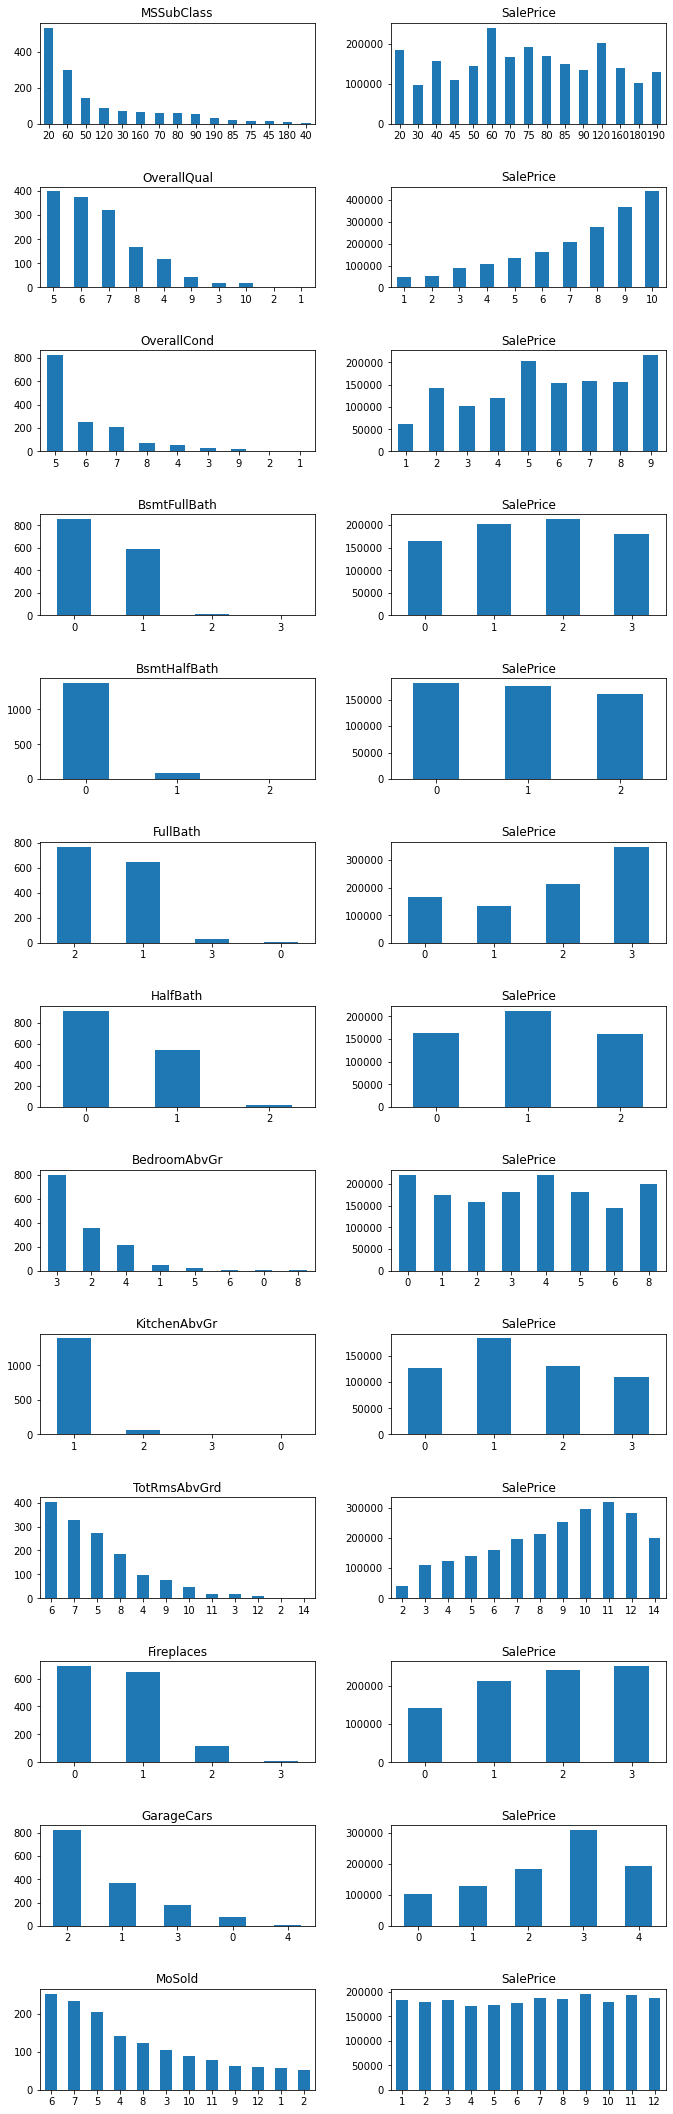

In [22]:
plt.figure(figsize=(10,30))
i = 1
for var in discrete:
    plt.subplot(13,2,i)
    i+=1
    plt.title(var)
    data[var].value_counts(dropna=True).sort_values(ascending=False).plot.bar(rot=0)
    plt.subplot(13,2,i)
    i+=1
    plt.title("SalePrice")
    data.groupby(var).SalePrice.mean().plot.bar(xlabel='',rot=0)
plt.tight_layout(pad = 3)

In [23]:
def discrete_value_counts(data, var):
    counts = data[var].value_counts(ascending=True)
    fractions = counts/data.count(axis=0).max()
    cumulative_frac = [fractions.iloc[0]]
    cumulative_frac += [fractions.iloc[i]+fractions.iloc[i-1] for i in range(1,len(fractions))]
    return pd.DataFrame({"count"    : counts.astype(int),
                         "fraction" : fractions,
                         "cum frac" : cumulative_frac}
                         
    ).round(3)

In [24]:
discrete_value_counts(data, "MSSubClass")

,count,fraction,cum frac
40,4,0.003,0.003
180,10,0.007,0.010
45,12,0.008,0.015
75,16,0.011,0.019
85,20,0.014,0.025
190,30,0.021,0.034
90,52,0.036,0.056
80,58,0.040,0.075
70,60,0.041,0.081
160,63,0.043,0.084


In [25]:
def avg_target_grouped_by_rareness(data, var, target = "SalePrice", tol = 0.05):
    data[var].value_counts()/data.count(axis=0).max() <= tol
    return pd.DataFrame(
        [data[data[var].map(data[var].value_counts()/data.count(axis=0).max() <= tol)][target].mean(),
         data[data[var].map(data[var].value_counts()/data.count(axis=0).max() > tol)][target].mean()],
        index = ["rare {}".format(var), "not rare {}".format(var)],
        columns = [target]
    )

In [26]:
avg_target_grouped_by_rareness(data, "MSSubClass", tol = 0.1)

,SalePrice
rare MSSubClass,148991.75200
not rare MSSubClass,204820.48024


In [27]:
discrete_value_counts(data, "OverallQual")

,count,fraction,cum frac
1,2,0.001,0.001
2,3,0.002,0.003
10,18,0.012,0.014
3,20,0.014,0.026
9,43,0.029,0.043
4,116,0.079,0.109
8,168,0.115,0.195
7,319,0.218,0.334
6,374,0.256,0.475
5,397,0.272,0.528


In [28]:
discrete_value_counts(data, "OverallCond")

,count,fraction,cum frac
1,1,0.001,0.001
2,5,0.003,0.004
9,22,0.015,0.018
3,25,0.017,0.032
4,57,0.039,0.056
8,72,0.049,0.088
7,205,0.140,0.190
6,252,0.173,0.313
5,821,0.562,0.735


In [29]:
discrete_value_counts(data, "FullBath")

,count,fraction,cum frac
0,9,0.006,0.006
3,33,0.023,0.029
1,650,0.445,0.468
2,768,0.526,0.971


In [30]:
data["TotalBsmtBath"] = data.BsmtFullBath + data.BsmtHalfBath

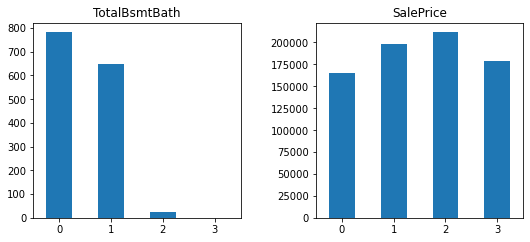

In [31]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title("TotalBsmtBath")
data.TotalBsmtBath.value_counts(dropna=True).sort_values(ascending=False).plot.bar(rot=0)
plt.subplot(1,2,2)
plt.title("SalePrice")
data.groupby("TotalBsmtBath").SalePrice.mean().plot.bar(xlabel='',rot=0)
plt.tight_layout(pad = 3)

In [32]:
data["TotalBath"] = data.FullBath + data.HalfBath

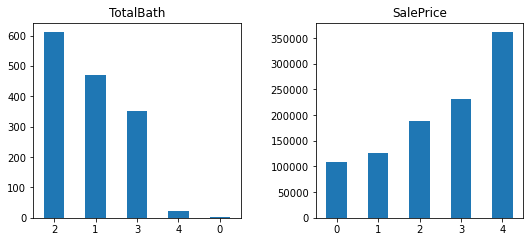

In [33]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title("TotalBath")
data.TotalBath.value_counts(dropna=True).sort_values(ascending=False).plot.bar(rot=0)
plt.subplot(1,2,2)
plt.title("SalePrice")
data.groupby("TotalBath").SalePrice.mean().plot.bar(xlabel='',rot=0)
plt.tight_layout(pad = 3)

In [34]:
discrete_value_counts(data, "TotalBath")

,count,fraction,cum frac
0,3,0.002,0.002
4,23,0.016,0.018
3,353,0.242,0.258
1,469,0.321,0.563
2,612,0.419,0.740


In [35]:
discrete_value_counts(data, "KitchenAbvGr")

,count,fraction,cum frac
0,1,0.001,0.001
3,2,0.001,0.002
2,65,0.045,0.046
1,1392,0.953,0.998


In [36]:
discrete_value_counts(data, "TotRmsAbvGrd")

,count,fraction,cum frac
2,1,0.001,0.001
14,1,0.001,0.001
12,11,0.008,0.008
3,17,0.012,0.019
11,18,0.012,0.024
10,47,0.032,0.045
9,75,0.051,0.084
4,97,0.066,0.118
8,187,0.128,0.195
5,275,0.188,0.316


In [37]:
discrete_value_counts(data, "MoSold")

,count,fraction,cum frac
2,52,0.036,0.036
1,58,0.040,0.075
12,59,0.040,0.080
9,63,0.043,0.084
11,79,0.054,0.097
10,89,0.061,0.115
3,106,0.073,0.134
8,122,0.084,0.156
4,141,0.097,0.180
5,204,0.140,0.236


#### Discrete variables remapping/rare encoding strategy:

- MSSubClass: seems quite a noisy feature, high cardinality. Will group most labels into "other"
- OverallQual: very predictive feature, some categories are very underrepresented. Will map 1,2,3,4 to "low", 5,6 to "medium" 7 to "medium high" and 8,9,10 to "high"
- OverallCond: similar approach to OverallQual. Mapping: 1,2,3,4 -> low; 5 -> medium; 6,7,8,9 -> high
- BsmtFullBath & BsmtHalfBath: sum the two features and make the resulting feature binary, as 2 and 3 are too poorly represented
- FullBath & HalfBath: sum the two features; group 0,1 together, leave 2 alone, group 3,4 together
- BedroomAbvGr: map to <3, 3, >3
- KitchenAbvGr: too unevenly distributed to be useful. Will resort to generic 'rare' label encoding with 0.05 tol
- TotRmsAbvGrd: map to <5, 5, 6, 7, 8, 9, 10+
- Fireplaces: 0, 1, 2+
- GarageCars: 0 means no garage. Map to 0, 1, 2, 3+
- MoSold: useless feature. Since we're not allowed to drop it, we'll group together the winter months and the fall months respectively since they're slightly underrepresented


In [38]:
data.drop(["BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath"], axis=1, inplace=True)

In [39]:
for var in ["BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath"]:
    discrete.remove(var)

In [40]:
data.OverallQual = data.OverallQual.map(
    {1: "low", 2: "low", 3: "low", 4: "low",
     5: "medium", 6: "medium", 7: "medium-high",
     8: "high", 9: "high", 10: "high"})

In [41]:
discrete.remove("OverallQual")
categorical.append("OverallQual")

In [42]:
data.OverallCond = data.OverallCond.map(
    {1: "low", 2: "low", 3: "low", 4: "low",
     5: "medium",
     6: "high", 7: "high", 8: "high", 9: "high"})

In [43]:
discrete.remove("OverallCond")
categorical.append("OverallCond")

In [44]:
data["BsmtBath"] = data.TotalBsmtBath.map(lambda x : "yes" if x > 0 else "no")

In [45]:
data.drop("TotalBsmtBath", axis=1, inplace=True)
categorical.append("BsmtBath")

In [46]:
data["Bath"] = data.TotalBath.map(
    lambda x : "0-1" if x < 2 else \
              ("2" if x == 2 else "3+"))

In [47]:
data.drop("TotalBath",axis=1, inplace=True)
categorical.append("Bath")

In [48]:
data["BedroomAbvGr"] = data.BedroomAbvGr.map(
    lambda x: "2-" if x<3 else ("3" if x==3 else "4+"))

In [49]:
discrete.remove("BedroomAbvGr")
categorical.append("BedroomAbvGr")

In [50]:
data.TotRmsAbvGrd = data.TotRmsAbvGrd.map(
    lambda x: "4-" if x<5 else \
             ("{}".format(x) if x in range(5,10) else "10+"))

In [51]:
discrete.remove("TotRmsAbvGrd")
categorical.append("TotRmsAbvGrd")

In [52]:
data.Fireplaces = data.Fireplaces.map(
    lambda x : "{}".format(x) if x in {0,1} else "2+")

In [53]:
discrete.remove("Fireplaces")
categorical.append("Fireplaces")

In [54]:
data.GarageCars = data.GarageCars.map(
    lambda x : "{}".format(x) if x in {0,1,2} else "3+")

In [55]:
discrete.remove("GarageCars")
categorical.append("GarageCars")

In [56]:
data.MoSold = data.MoSold.map(
    lambda x : "winter" if x in {12,1,2} else \
              ("fall" if x in {9,10,11} else "{}th".format(x)))

In [57]:
discrete.remove("MoSold")
categorical.append("MoSold")

In [58]:
len(categorical)

52

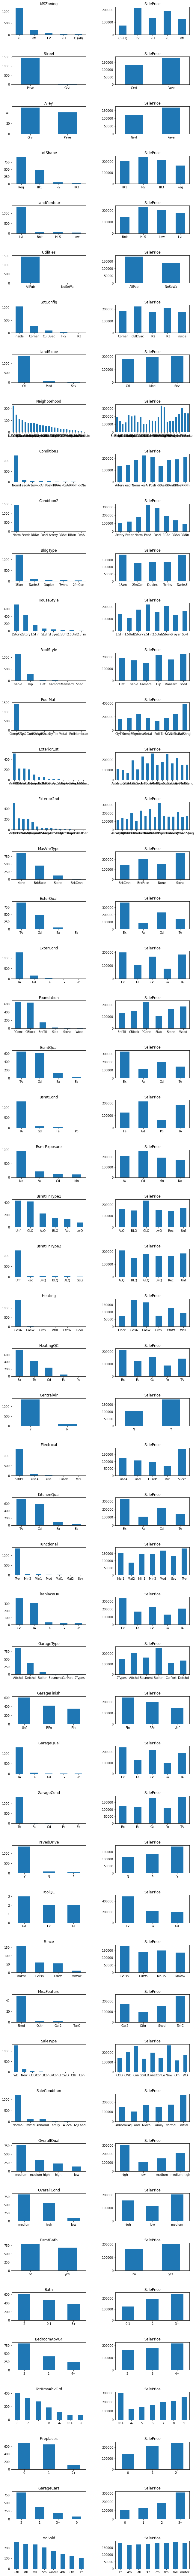

In [59]:
plt.figure(figsize=(10,120))
i = 1
for var in categorical:
    plt.subplot(52,2,i)
    i+=1
    plt.title(var)
    data[var].value_counts(dropna=True).sort_values(ascending=False).plot.bar(rot=0)
    plt.subplot(52,2,i)
    i+=1
    plt.title("SalePrice")
    data.groupby(var).SalePrice.mean().plot.bar(xlabel='',rot=0)
plt.tight_layout(pad = 4)

In [60]:
discrete_value_counts(data, "MSZoning")

,count,fraction,cum frac
C (all),10,0.007,0.007
RH,16,0.011,0.018
FV,65,0.045,0.055
RM,218,0.149,0.194
RL,1151,0.788,0.938


In [61]:
discrete_value_counts(data, "Street")

,count,fraction,cum frac
Grvl,6,0.004,0.004
Pave,1454,0.996,1.000


In [62]:
discrete_value_counts(data, "Alley")

,count,fraction,cum frac
Pave,41,0.028,0.028
Grvl,50,0.034,0.062


In [63]:
discrete_value_counts(data, "LandContour")

,count,fraction,cum frac
Low,36,0.025,0.025
HLS,50,0.034,0.059
Bnk,63,0.043,0.077
Lvl,1311,0.898,0.941


In [64]:
discrete_value_counts(data, "Utilities")

,count,fraction,cum frac
NoSeWa,1,0.001,0.001
AllPub,1459,0.999,1.000


In [65]:
discrete_value_counts(data, "LotConfig")

,count,fraction,cum frac
FR3,4,0.003,0.003
FR2,47,0.032,0.035
CulDSac,94,0.064,0.097
Corner,263,0.180,0.245
Inside,1052,0.721,0.901


In [66]:
discrete_value_counts(data, "LandSlope")

,count,fraction,cum frac
Sev,13,0.009,0.009
Mod,65,0.045,0.053
Gtl,1382,0.947,0.991


In [67]:
discrete_value_counts(data, "Neighborhood")

,count,fraction,cum frac
Blueste,2,0.001,0.001
NPkVill,9,0.006,0.008
Veenker,11,0.008,0.014
BrDale,16,0.011,0.018
Blmngtn,17,0.012,0.023
MeadowV,17,0.012,0.023
StoneBr,25,0.017,0.029
SWISU,25,0.017,0.034
ClearCr,28,0.019,0.036
IDOTRR,37,0.025,0.045


In [68]:
avg_target_grouped_by_rareness(data, "Neighborhood", tol = 0.05)

,SalePrice
rare Neighborhood,189261.431655
not rare Neighborhood,175791.581858


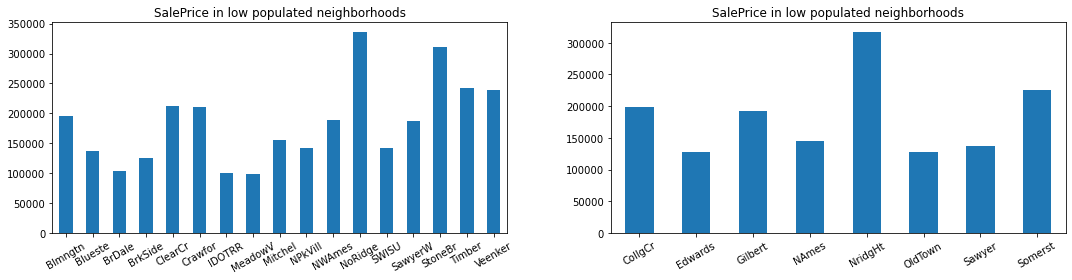

In [69]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title("SalePrice in low populated neighborhoods")
data[data.Neighborhood.map(data.Neighborhood.value_counts()/data.count(axis=0).max() <= 0.05)].groupby("Neighborhood").SalePrice.mean().plot.bar(xlabel='',rot=30)
plt.subplot(1,2,2)
plt.title("SalePrice in low populated neighborhoods")
data[data.Neighborhood.map(data.Neighborhood.value_counts()/data.count(axis=0).max() > 0.05)].groupby("Neighborhood").SalePrice.mean().plot.bar(xlabel='',rot=30)
plt.tight_layout(w_pad = 5);

In [70]:
discrete_value_counts(data, "RoofMatl")

,count,fraction,cum frac
ClyTile,1,0.001,0.001
Metal,1,0.001,0.001
Roll,1,0.001,0.001
Membran,1,0.001,0.001
WdShake,5,0.003,0.004
WdShngl,6,0.004,0.008
Tar&Grv,11,0.008,0.012
CompShg,1434,0.982,0.990


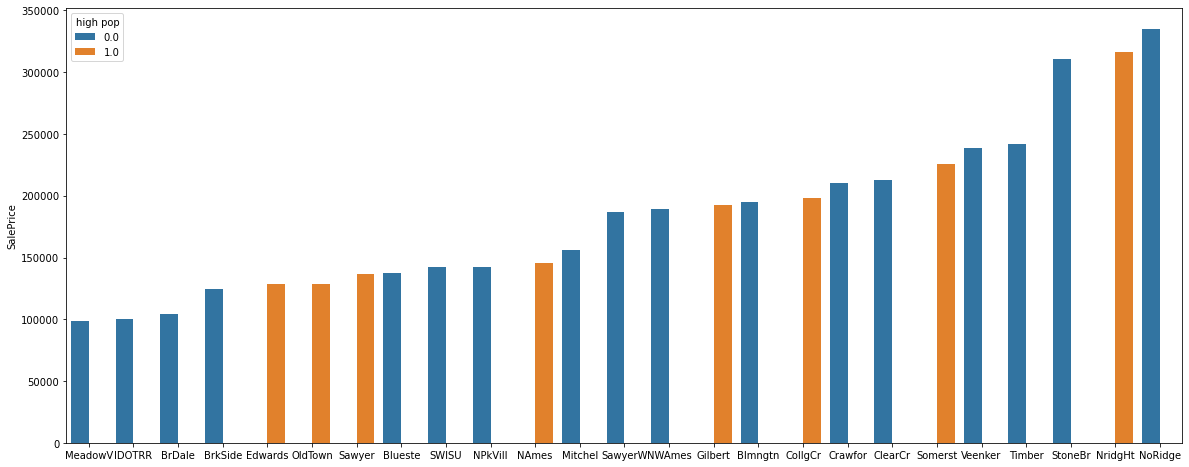

In [71]:
low = data[data.Neighborhood.map(data.Neighborhood.value_counts()/data.count(axis=0).max() <= 0.05)].groupby("Neighborhood").SalePrice.mean().to_frame()
high = data[data.Neighborhood.map(data.Neighborhood.value_counts()/data.count(axis=0).max() > 0.05)].groupby("Neighborhood").SalePrice.mean().to_frame()
low["high pop"] = np.zeros(low.count())
high["high pop"]=np.ones(high.count())
neighborhoods = pd.concat([low,high])
neighborhoods = neighborhoods.sort_values("SalePrice")
plt.figure(figsize=(20,8))
sn.barplot(x = neighborhoods.index.values, y = neighborhoods.SalePrice, hue = neighborhoods["high pop"]);

In [72]:
discrete_value_counts(data, "Condition1")

,count,fraction,cum frac
RRNe,2,0.001,0.001
RRNn,5,0.003,0.005
PosA,8,0.005,0.009
RRAe,11,0.008,0.013
PosN,19,0.013,0.021
RRAn,26,0.018,0.031
Artery,48,0.033,0.051
Feedr,81,0.055,0.088
Norm,1260,0.863,0.918


In [73]:
discrete_value_counts(data, "Condition2")

,count,fraction,cum frac
RRAe,1,0.001,0.001
RRAn,1,0.001,0.001
PosA,1,0.001,0.001
RRNn,2,0.001,0.002
PosN,2,0.001,0.003
Artery,2,0.001,0.003
Feedr,6,0.004,0.005
Norm,1445,0.990,0.994


In [74]:
discrete_value_counts(data, "BldgType")

,count,fraction,cum frac
2fmCon,31,0.021,0.021
Twnhs,43,0.029,0.051
Duplex,52,0.036,0.065
TwnhsE,114,0.078,0.114
1Fam,1220,0.836,0.914


In [75]:
discrete_value_counts(data, "HouseStyle")

,count,fraction,cum frac
2.5Fin,8,0.005,0.005
2.5Unf,11,0.008,0.013
1.5Unf,14,0.010,0.017
SFoyer,37,0.025,0.035
SLvl,65,0.045,0.070
1.5Fin,154,0.105,0.150
2Story,445,0.305,0.410
1Story,726,0.497,0.802


In [76]:
discrete_value_counts(data, "RoofStyle")

,count,fraction,cum frac
Shed,2,0.001,0.001
Mansard,7,0.005,0.006
Gambrel,11,0.008,0.012
Flat,13,0.009,0.016
Hip,286,0.196,0.205
Gable,1141,0.782,0.977


In [77]:
avg_target_grouped_by_rareness(data, "RoofStyle", tol = 0.05)

,SalePrice
rare RoofStyle,178271.181818
not rare RoofStyle,180982.478626


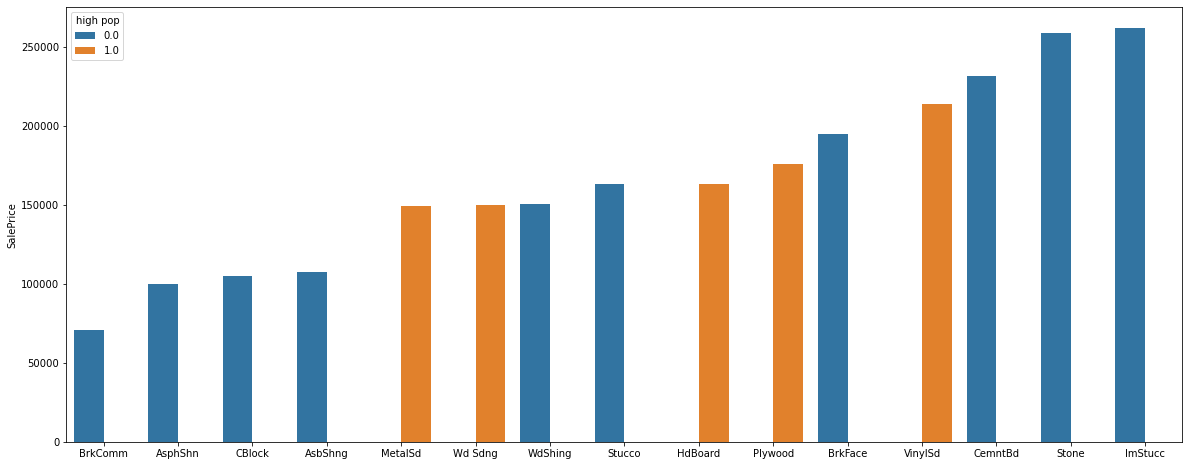

In [78]:
low = data[data.Exterior1st.map(data.Exterior1st.value_counts()/data.count(axis=0).max() <= 0.05)].groupby("Exterior1st").SalePrice.mean().to_frame()
high = data[data.Exterior1st.map(data.Exterior1st.value_counts()/data.count(axis=0).max() > 0.05)].groupby("Exterior1st").SalePrice.mean().to_frame()
low["high pop"]  = np.zeros(low.count())
high["high pop"] = np.ones(high.count())
exterior1st = pd.concat([low,high])
exterior1st = exterior1st.sort_values("SalePrice")
plt.figure(figsize=(20,8))
sn.barplot(x = exterior1st.index.values, y =exterior1st.SalePrice, hue = exterior1st["high pop"]);

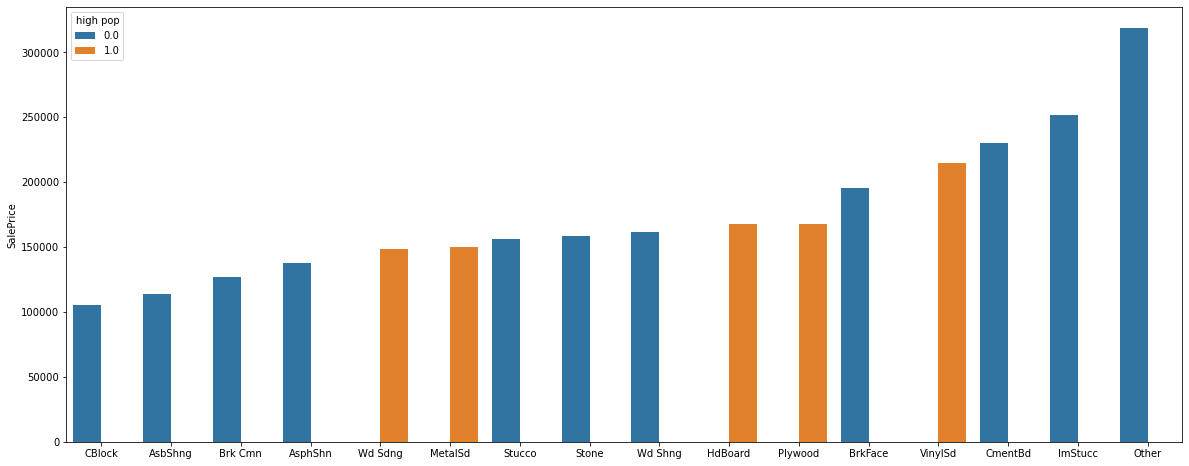

In [79]:
low = data[data.Exterior2nd.map(data.Exterior2nd.value_counts()/data.count(axis=0).max() <= 0.05)].groupby("Exterior2nd").SalePrice.mean().to_frame()
high = data[data.Exterior2nd.map(data.Exterior2nd.value_counts()/data.count(axis=0).max() > 0.05)].groupby("Exterior2nd").SalePrice.mean().to_frame()
low["high pop"]  = np.zeros(low.count())
high["high pop"] = np.ones(high.count())
Exterior2nd = pd.concat([low,high])
Exterior2nd = Exterior2nd.sort_values("SalePrice")
plt.figure(figsize=(20,8))
sn.barplot(x = Exterior2nd.index.values, y =Exterior2nd.SalePrice, hue = Exterior2nd["high pop"]);

In [80]:
discrete_value_counts(data, "ExterCond")

,count,fraction,cum frac
Po,1,0.001,0.001
Ex,3,0.002,0.003
Fa,28,0.019,0.021
Gd,146,0.100,0.119
TA,1282,0.878,0.978


In [81]:
discrete_value_counts(data, "BsmtQual")

,count,fraction,cum frac
Fa,35,0.024,0.024
Ex,121,0.083,0.107
Gd,618,0.423,0.506
TA,649,0.445,0.868


In [82]:
discrete_value_counts(data, "BsmtCond")

,count,fraction,cum frac
Po,2,0.001,0.001
Fa,45,0.031,0.032
Gd,65,0.045,0.075
TA,1311,0.898,0.942


In [83]:
discrete_value_counts(data, "BsmtExposure")

,count,fraction,cum frac
Mn,114,0.078,0.078
Gd,134,0.092,0.170
Av,221,0.151,0.243
No,953,0.653,0.804


In [84]:
discrete_value_counts(data,"BsmtFinType1")

,count,fraction,cum frac
LwQ,74,0.051,0.051
Rec,133,0.091,0.142
BLQ,148,0.101,0.192
ALQ,220,0.151,0.252
GLQ,418,0.286,0.437
Unf,430,0.295,0.581


In [85]:
discrete_value_counts(data,"BsmtFinType2")

,count,fraction,cum frac
GLQ,14,0.010,0.010
ALQ,19,0.013,0.023
BLQ,33,0.023,0.036
LwQ,46,0.032,0.054
Rec,54,0.037,0.068
Unf,1256,0.860,0.897


In [86]:
discrete_value_counts(data, "Electrical")

,count,fraction,cum frac
Mix,1,0.001,0.001
FuseP,3,0.002,0.003
FuseF,27,0.018,0.021
FuseA,94,0.064,0.083
SBrkr,1334,0.914,0.978


In [87]:
discrete_value_counts(data, "KitchenQual")

,count,fraction,cum frac
Fa,39,0.027,0.027
Ex,100,0.068,0.095
Gd,586,0.401,0.470
TA,735,0.503,0.905


In [88]:
discrete_value_counts(data, "Functional")

,count,fraction,cum frac
Sev,1,0.001,0.001
Maj2,5,0.003,0.004
Maj1,14,0.010,0.013
Mod,15,0.010,0.020
Min1,31,0.021,0.032
Min2,34,0.023,0.045
Typ,1360,0.932,0.955


In [89]:
discrete_value_counts(data, "FireplaceQu")

,count,fraction,cum frac
Po,20,0.014,0.014
Ex,24,0.016,0.030
Fa,33,0.023,0.039
TA,313,0.214,0.237
Gd,380,0.260,0.475


In [90]:
discrete_value_counts(data, "GarageType")

,count,fraction,cum frac
2Types,6,0.004,0.004
CarPort,9,0.006,0.010
Basment,19,0.013,0.019
BuiltIn,88,0.060,0.073
Detchd,387,0.265,0.325
Attchd,870,0.596,0.861


In [91]:
discrete_value_counts(data, "GarageQual")

,count,fraction,cum frac
Ex,3,0.002,0.002
Po,3,0.002,0.004
Gd,14,0.010,0.012
Fa,48,0.033,0.042
TA,1311,0.898,0.931


In [92]:
discrete_value_counts(data, "PavedDrive")

,count,fraction,cum frac
P,30,0.021,0.021
N,90,0.062,0.082
Y,1340,0.918,0.979


In [93]:
discrete_value_counts(data, "Fence")

,count,fraction,cum frac
MnWw,11,0.008,0.008
GdWo,54,0.037,0.045
GdPrv,59,0.040,0.077
MnPrv,157,0.108,0.148


In [94]:
discrete_value_counts(data, "MiscFeature")

,count,fraction,cum frac
TenC,1,0.001,0.001
Othr,2,0.001,0.002
Gar2,2,0.001,0.003
Shed,49,0.034,0.035


In [95]:
discrete_value_counts(data, "SaleType")

,count,fraction,cum frac
Con,2,0.001,0.001
Oth,3,0.002,0.003
CWD,4,0.003,0.005
ConLw,5,0.003,0.006
ConLI,5,0.003,0.007
ConLD,9,0.006,0.010
COD,43,0.029,0.036
New,122,0.084,0.113
WD,1267,0.868,0.951


In [96]:
avg_target_grouped_by_rareness(data, "SaleType")

,SalePrice
rare SaleType,153541.943662
not rare SaleType,182320.711303


In [97]:
discrete_value_counts(data, "SaleCondition")

,count,fraction,cum frac
AdjLand,4,0.003,0.003
Alloca,12,0.008,0.011
Family,20,0.014,0.022
Abnorml,101,0.069,0.083
Partial,125,0.086,0.155
Normal,1198,0.821,0.906


#### Categorical features encoding strategy:

- MSZoning: group {C,RH,RM} and {RL,FV}
- Street: useless feature. Can't do anything about it. Just throw it in standard rare < 0.05 encoding pipeline I guess
- Alley: see above. Most rows are missing so it will essentially be alley/non alley
- LotShape: interestingly enough, houses with an irregular shape seem to have a higher value on average. Will make it binary Reg/Irreg though
- LandContour: this is an interesting one, as houses built on hillslopes are more expensive than those built on flat land but so are those build on lower grounds, according to this dataset. Then again, it's probably a consequence of undersampling, but we'll do a standard rare encoding to be safe
- Utilities: garbage feature, with only one row different from the rest.
- LotConfig: non-standard configurations are more expensive. A standard rare encoding with tol = 0.07 will capture it
- LandSlope: again, standard rare encoding, tol = 0.05
- Neighborhood: complex feature, high cardinality, high noise. We'll do a visual-based clustering to get rid of the underrepresented neighborhoods
- Condition1: since proximity to feeder street seems to decrease the value of a house, we'll leave that chunk of population intact and to rare 0.05
- Condition2: garbage feature, ought to drop it...
- BldgType: rare 0.05
- HouseStyle: rare 0.05
- RoofStyle: frequent 
- RoofMatl: should just drop it. Rare 0.05 which makes it binary...
- Exterior1st & Exterior2nd: see neighborhood
- MasVnrType: this feature assigns missing data to an actual "None" category. Shall remap those to nan so that the imputer adds missing indicators properly. BrkCmn --> NaN too
- ExteriorQual: {FA,TA} --> low, {Gd,Ex} --> high
- ExterCond: {FA,TA,PO} --> low, {Gd,Ex} --> high
- Foundation: group BrkTil,Slab,Stone,Wood into "other"
- BsmtQual: {TA,Fa} -> low
- BsmtCond: bad feature. Gonna have to resort to rare 0.05
- BsmtExposure: straight to ordinal encoding
- BsmtFinType1: {LwQ,Rec,BLQ} --> "low"
- BsmtFinType2: rare 0.05 (binarize)
- Heating: garbage. Rare 0.05 binarization
- HeatingQC: {Fa,Po} --> "low"
- CentralAir: straight to ordinal
- Electrical: rare 0.07
- KitchenQual: Excellent quality kitchens seem to have a high influence on the final price. {Fa,TA} --> "low"
- Functional: rare 0.05
- FireplaceQu: {Fa,TA,PO} --> "low", {Gd,Ex} --> "high"
- GarageType: built-in garages seem to be a premium feature. {2Types,CarPort,Basment} into Attchd to reduce cardinality
- GarageFinish: no preprocessing needed
- GarageQual: kind of garbage. Rare 0.05 I guess
- GarageCond: same as above
- PavedDrive: stack P and N together, make it binary.
- PoolQC: absolutely garbage feature. rare 0.05 but it's a shame really
- Fence: kinda bad since most data is missing, but will do rare 0.05
- MiscFeature: garbage. Rare 0.05
- SaleType: all but NEW goes into WD
- SaleCondition: Partial comes with higher value houses. Everything else goes into a single stack

In [98]:
data.MSZoning = data.MSZoning.map(
    lambda x : "A" if x in {"C (all)","RH","RM"} else "B")

In [99]:
data.LotShape = data.LotShape.map(
    lambda x : x if x == "Reg" else "Irreg")

In [100]:
high_pop_neighborhoods = ["Edwards", "OldTown", "Sawyer", "NAmes",
                          "Gilbert", "CollgCr", "Somerst", "NridgHt"]
high_pop_neighborhoods_map = {
    high_pop_neighborhoods[i]: "N{}".format(i+1) \
        for i in range(len(high_pop_neighborhoods))}
data.Neighborhood = data.Neighborhood.map(
    lambda x : high_pop_neighborhoods_map[x] if x in high_pop_neighborhoods \
    else (high_pop_neighborhoods_map["Edwards"] if x in {
        "Meadow", "VIDOTRR", "BrDale", "BrkSide"}\
    else (high_pop_neighborhoods_map["Sawyer"] if x == "Blueste"\
    else (high_pop_neighborhoods_map["NAmes"] if x in {
        "SWISU", "NPkVill", "Mitchel"}\
    else (high_pop_neighborhoods_map["Gilbert"] if x in {
        "SawyerW", "NWAmes", "Blmngtn"}\
    else (high_pop_neighborhoods_map["CollgCr"] if x in {
        "Crawfor", "ClearCr"}\
    else (high_pop_neighborhoods_map["Somerst"] if x in {
        "Veenker", "Timber"}\
    else high_pop_neighborhoods_map["NridgHt"])))))))

In [101]:
data.RoofStyle = data.RoofStyle.map(
    lambda x : x if x in {"Gable", "Hip"} else "Gable")

In [102]:
high_pop_ext1 = ["MetalSd", "Wd Sdng", "HdBoard", "Plywood", "VinylSd"]
high_pop_ext1_map = {high_pop_ext1[i]: "M{}".format(i+1) for i in range(len(high_pop_ext1))}
data.Exterior1st = data.Exterior1st.map(
    lambda x : high_pop_ext1_map[x] if x in high_pop_ext1 else (
        high_pop_ext1_map["MetalSd"] if x in {"BrkComm", "AsphShn", "CBlock", "AsbShng"} else (
        high_pop_ext1_map["Wd Sdng"] if x == "WdShing" else (
        high_pop_ext1_map["HdBoard"] if x == "Stucco" else (
        high_pop_ext1_map["Plywood"] if x == "BrkFace" else
        high_pop_ext1_map["VinylSd"])))))

In [103]:
high_pop_ext2 = ["Wd Sdng", "MetalSd", "HdBoard", "Plywood", "VinylSd"]
high_pop_ext2_map = {high_pop_ext2[i]: "M{}".format(i+1) for i in range(len(high_pop_ext2))}
data.Exterior2nd = data.Exterior2nd.map(
    lambda x : high_pop_ext2_map[x] if x in high_pop_ext2 else(
        high_pop_ext2_map["Wd Sdng"] if x in {"CBlock", "AsbShng", "Brk Cmn", "AsphShn"} else (
        high_pop_ext2_map["MetalSd"] if x in {"Stucco", "Stone"} else (
        high_pop_ext2_map["HdBoard"] if x == "Wd Shng" else (
        high_pop_ext2_map["Plywood"] if x == "BrkFace" else
        high_pop_ext2_map["VinylSd"])))))

In [104]:
data.MasVnrType = data.MasVnrType.map(
    lambda x : np.NaN if (x == "None" or x == "BrkCmn") else x)

In [105]:
data.ExterQual = data.ExterQual.map(
    lambda x : "low" if x in {"TA", "Fa"} else "high")

In [106]:
data.ExterCond = data.ExterCond.map(
    lambda x : "low" if x in {"Fa", "TA", "Po"} else "high")

In [107]:
data.BsmtQual = data.BsmtQual.map(
    lambda x : "low" if x in {"Fa", "TA"} else x)

In [108]:
data.BsmtFinType1 = data.BsmtFinType1.map(
    lambda x : "low" if x in {"LwQ", "Rec", "BLQ"} else x)

In [109]:
data.HeatingQC = data.HeatingQC.map(
    lambda x : "low" if x in {"Fa","Po"} else x)

In [110]:
data.KitchenQual = data.KitchenQual.map(
    lambda x : "low" if x in {"Fa", "TA"} else x)

In [111]:
data.FireplaceQu = data.FireplaceQu.map(
    lambda x : "low" if x in {"Fa", "TA", "Po"} else "high")

In [112]:
data.GarageType = data.GarageType.map(
    lambda x : "other" if x in {"2Types","CarPort","Basement","Attchd"} else x)

In [113]:
data.PavedDrive = data.PavedDrive.map(
    lambda x : "no" if x in {"N","P"} else "yes")

In [114]:
data.SaleType = data.SaleType.map(
    lambda x : "A" if x == "New" else "B")

In [115]:
data.SaleCondition = data.SaleCondition.map(
    lambda x : "A" if x == "Partial" else "B")

In [116]:
def elapsed_years(df, var):
    # capture difference between year variable and
    # year the house was sold
    
    df[var] = df['YrSold'] - df[var]
    return df

In [117]:
for var in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    data = elapsed_years(data, var)

In [118]:
data.drop("YrSold", axis=1,inplace=True)

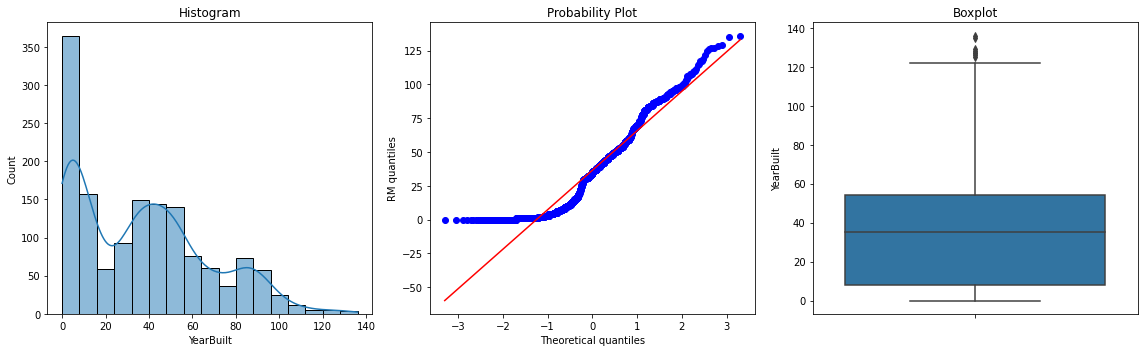

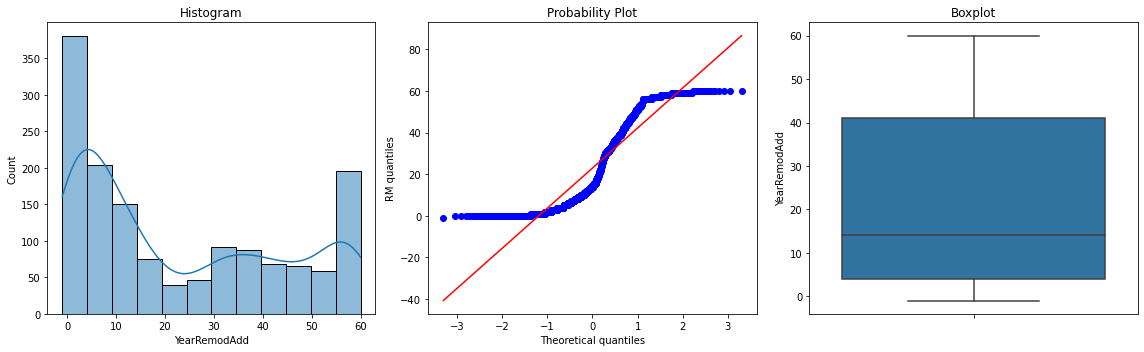

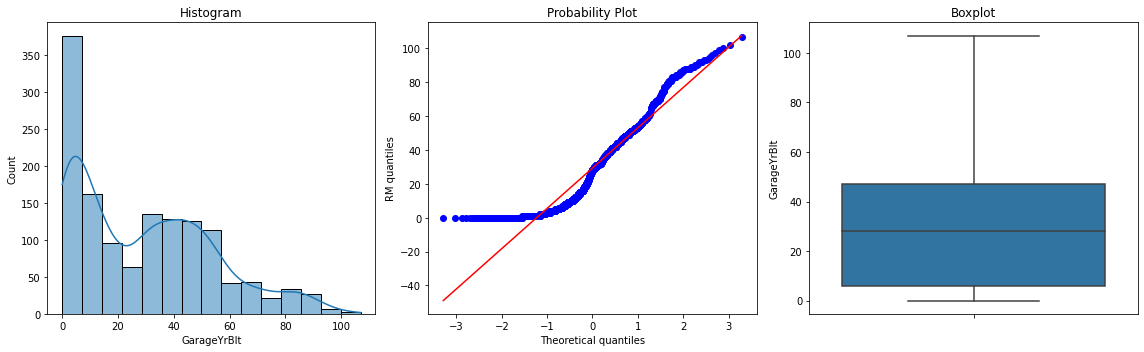

In [119]:
for var in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    diagnostic_plots(data, var)

In [120]:
len(numerical)

19

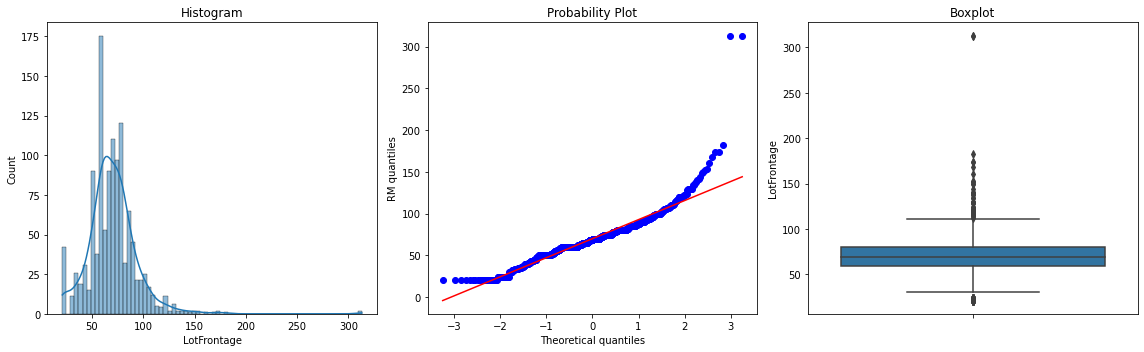

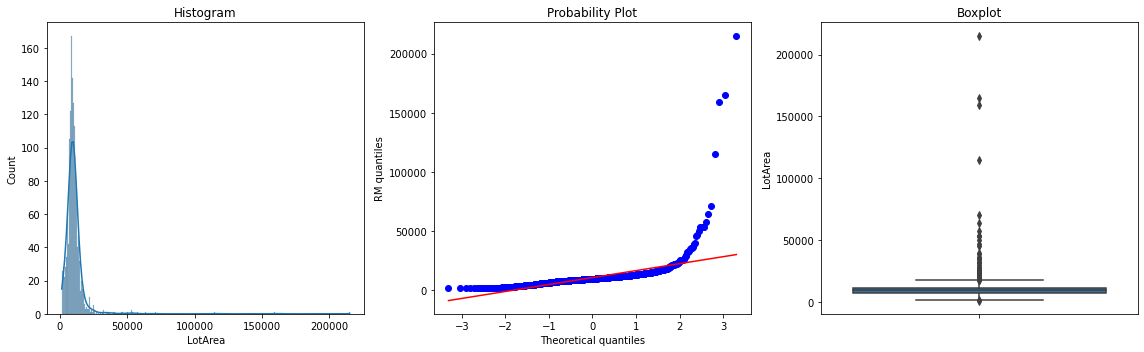

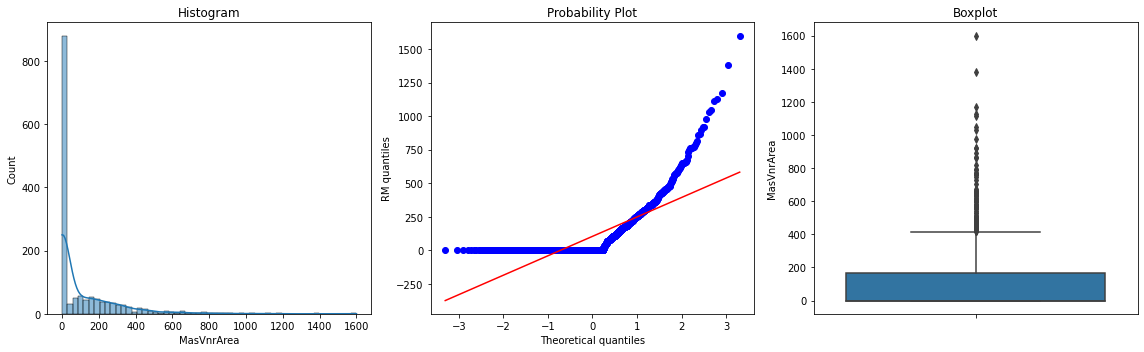

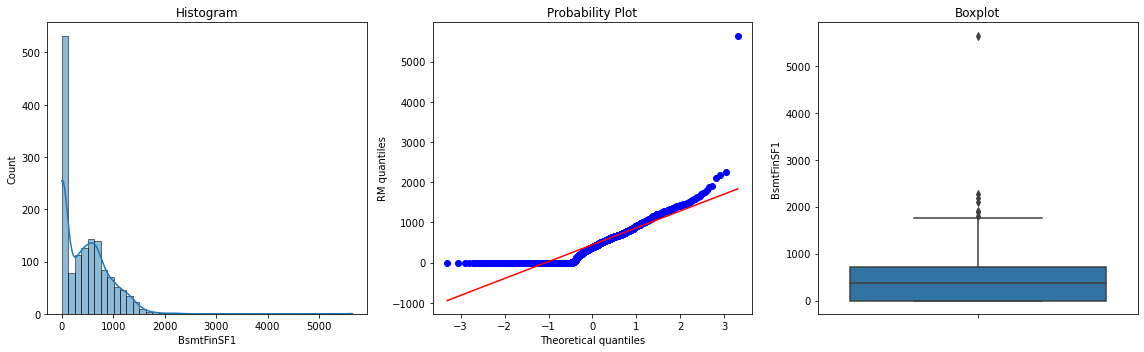

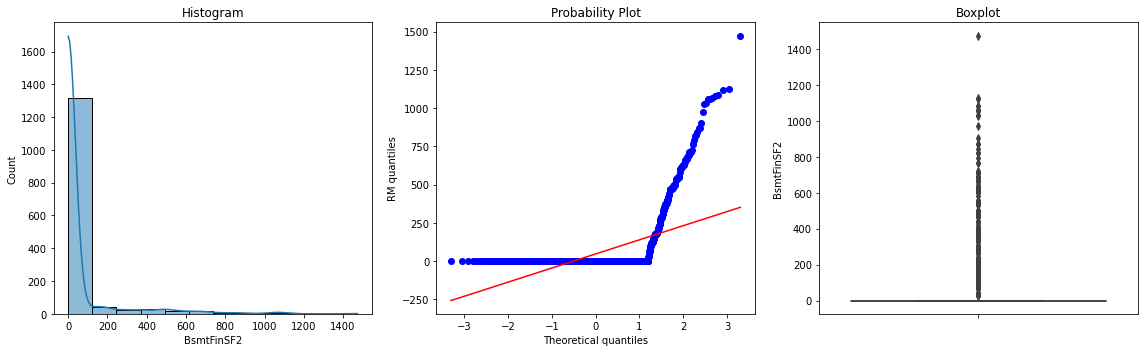

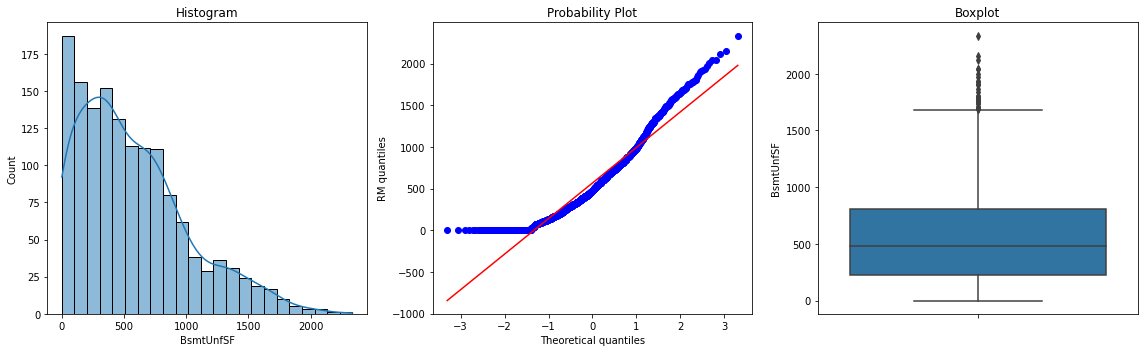

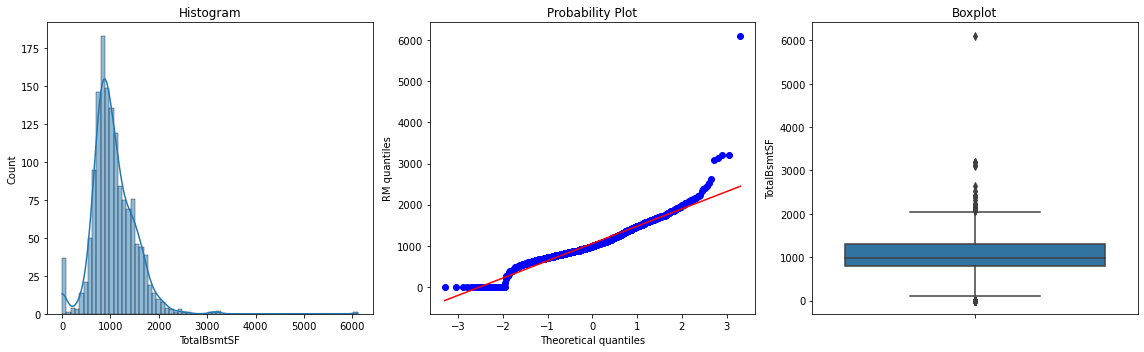

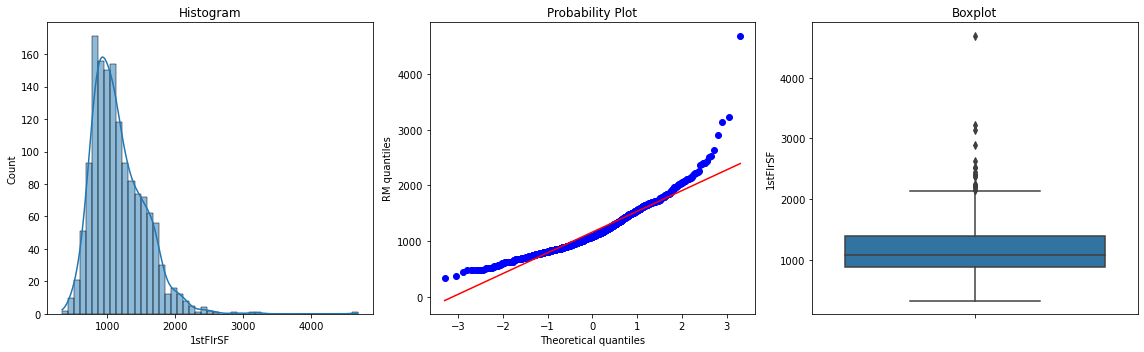

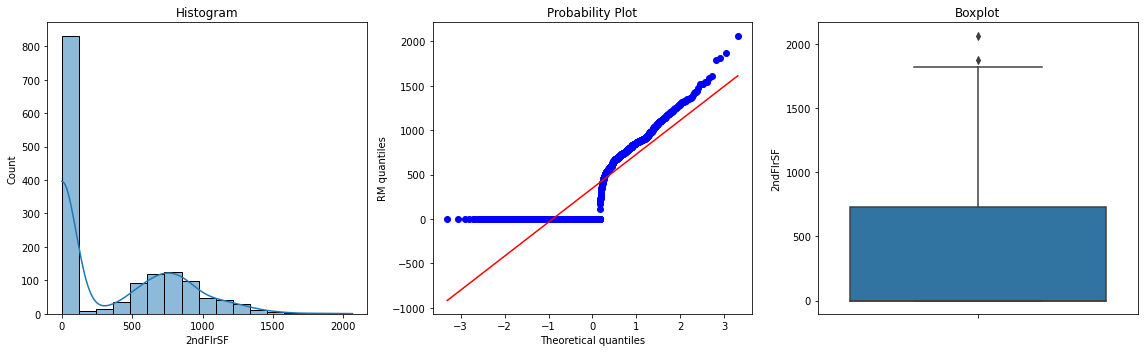

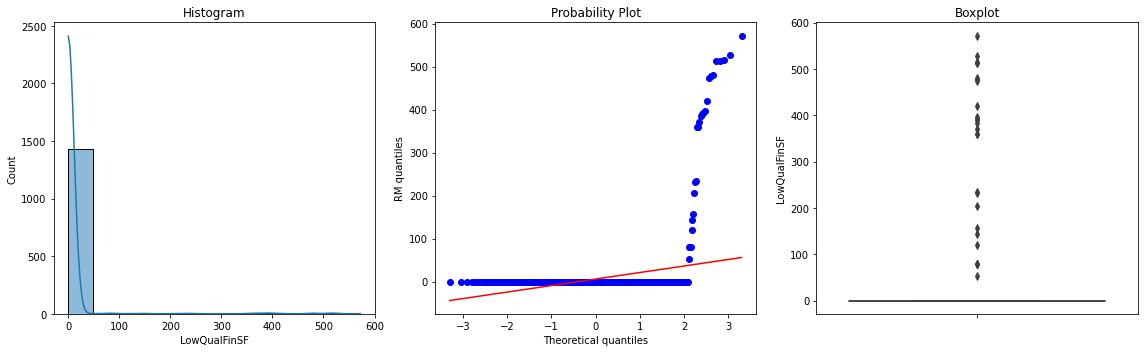

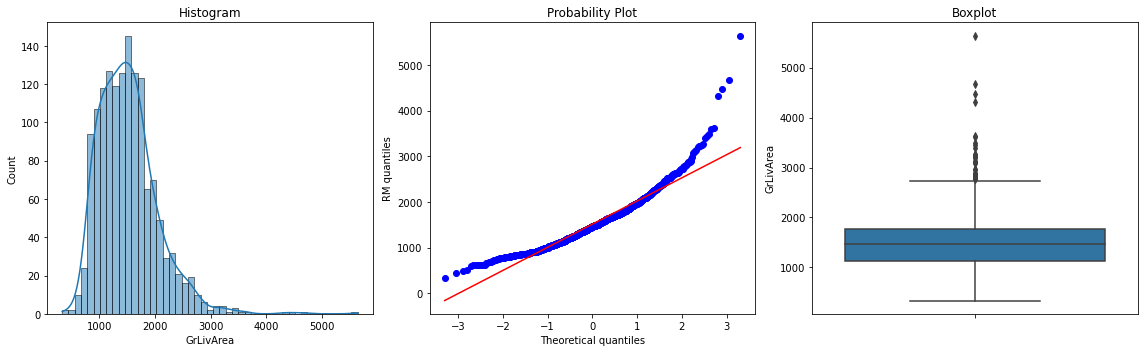

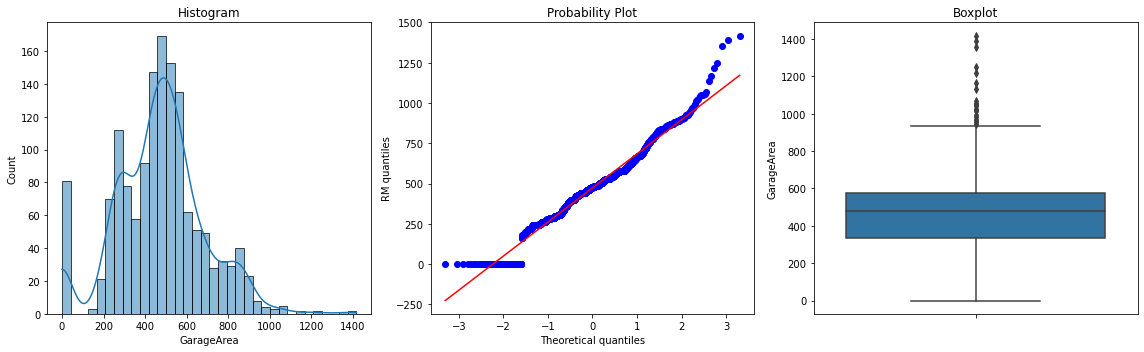

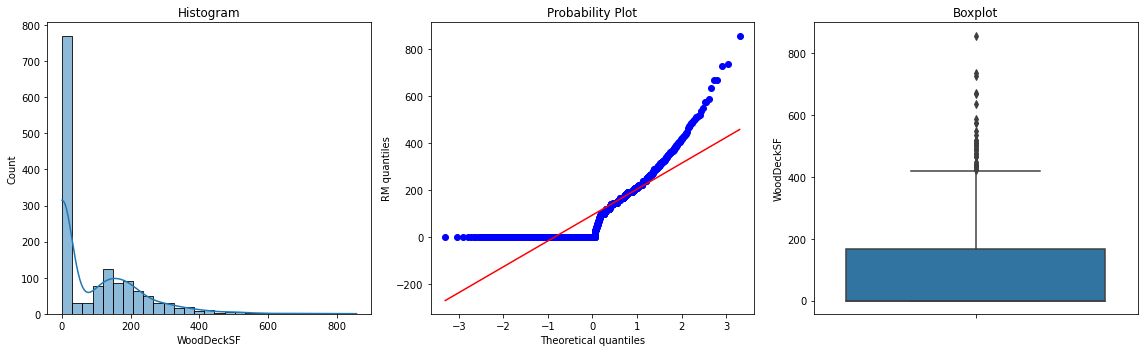

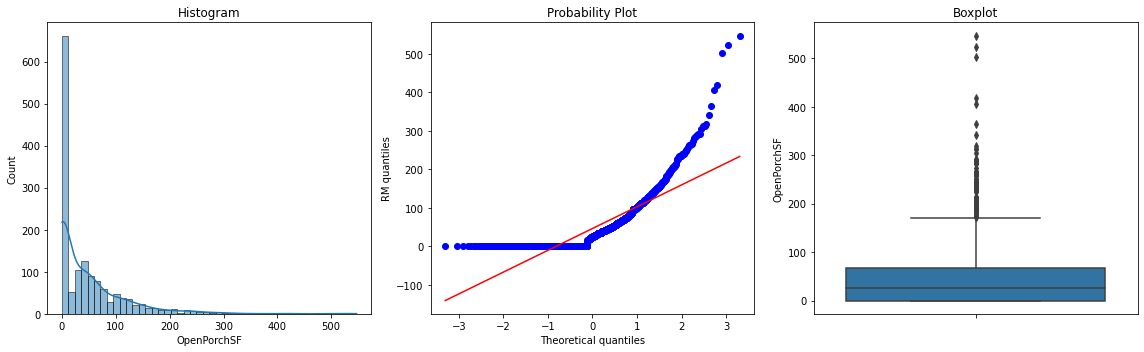

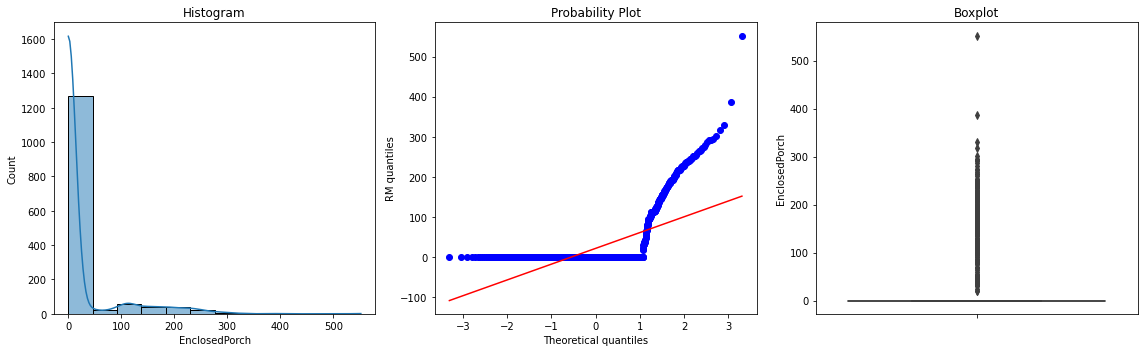

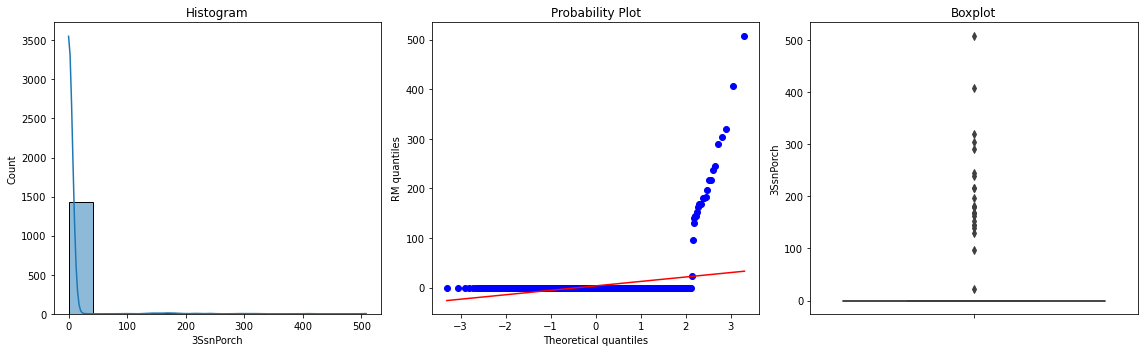

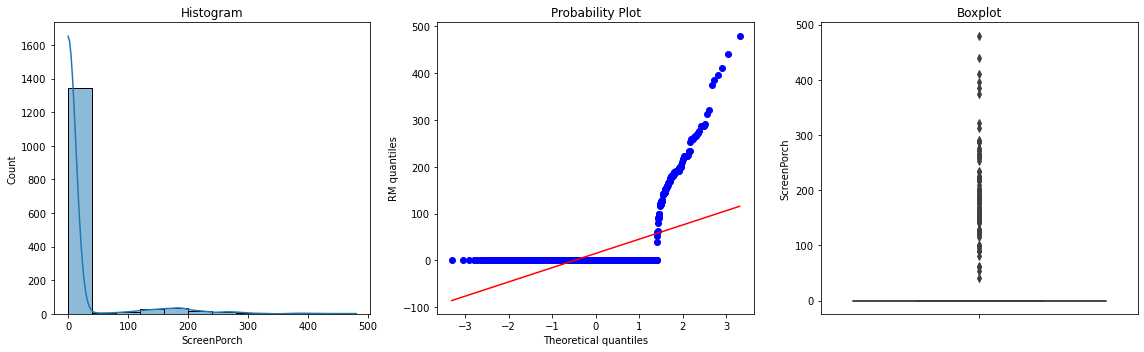

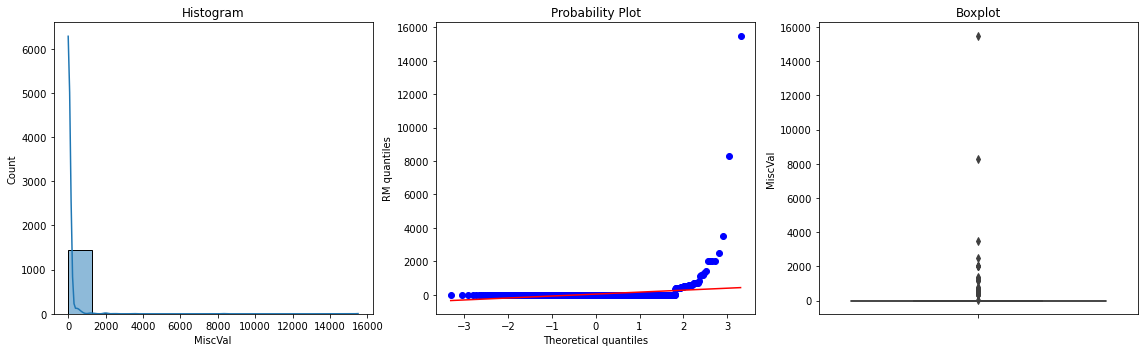

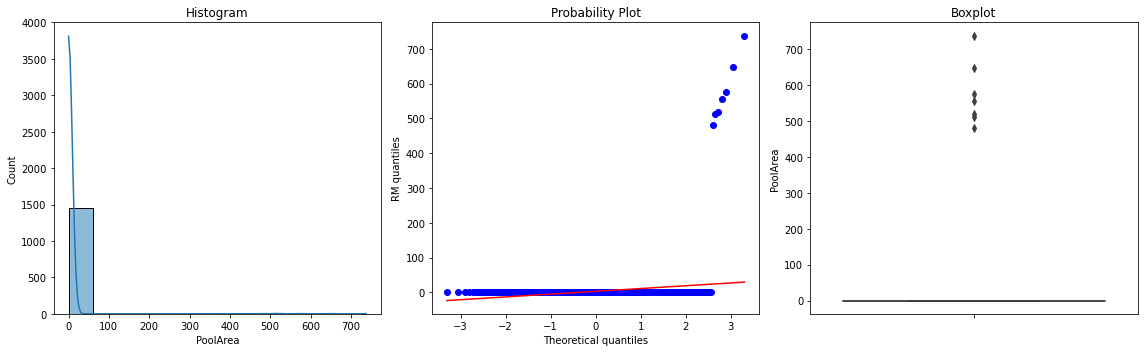

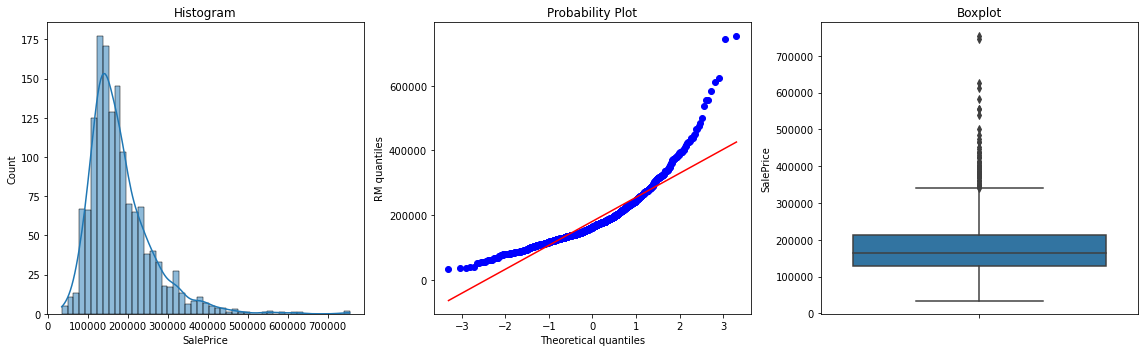

In [121]:
for var in numerical+["SalePrice"]:
    diagnostic_plots(data, var)

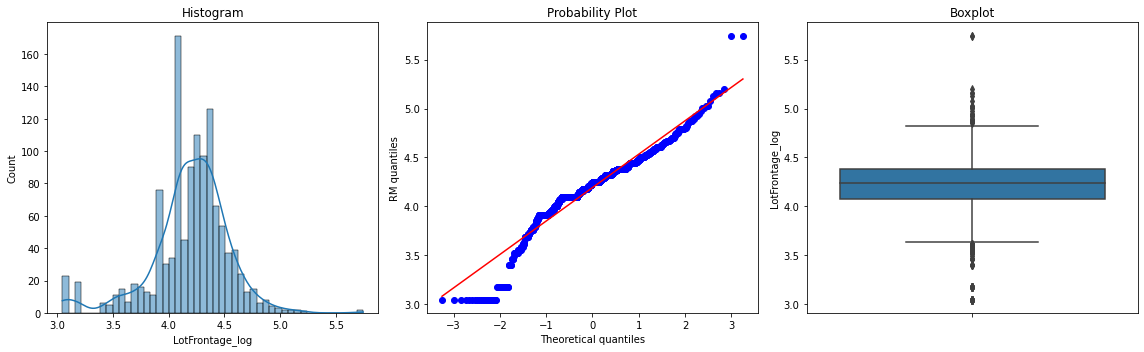

In [122]:
data["LotFrontage_log"] = np.log(data.LotFrontage)
diagnostic_plots(data, "LotFrontage_log")

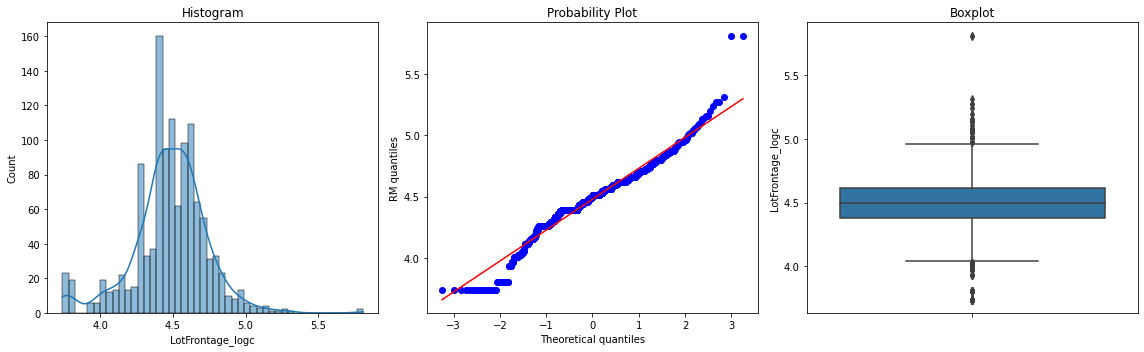

In [123]:
data["LotFrontage_logc"] = np.log(np.abs(data.LotFrontage.min())+data.LotFrontage)
diagnostic_plots(data, "LotFrontage_logc")

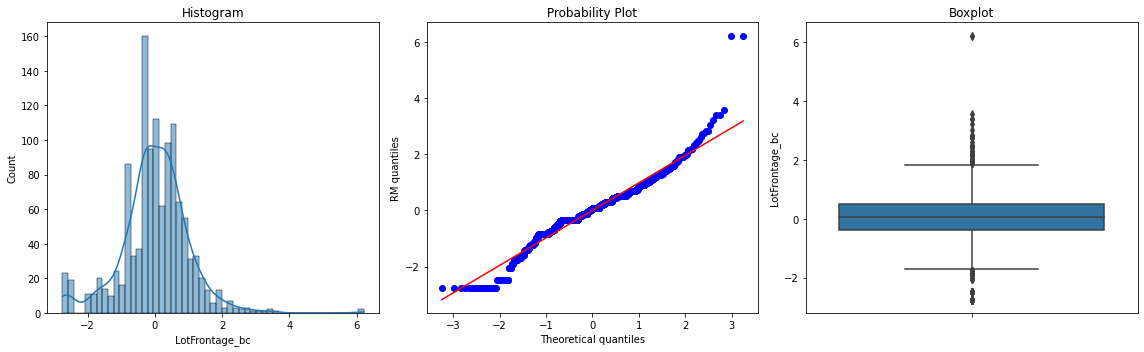

In [124]:
data["LotFrontage_bc"] = power_transform(
    data.LotFrontage.to_frame(), method='box-cox')
diagnostic_plots(data, "LotFrontage_bc")

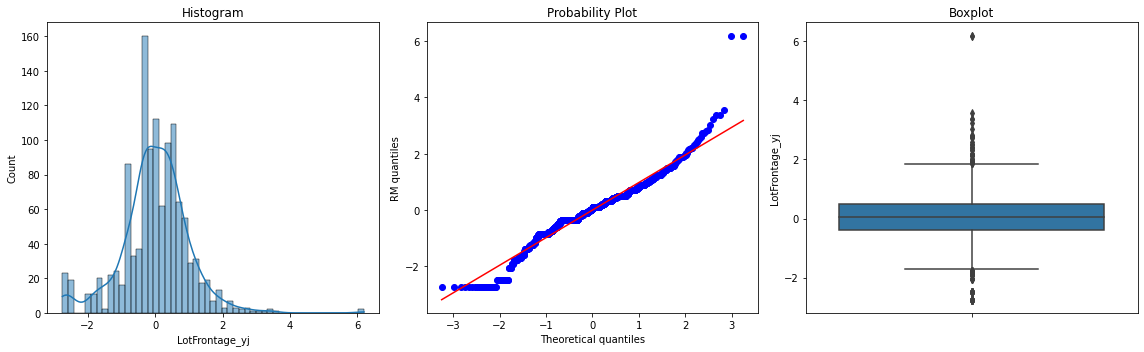

In [125]:
data["LotFrontage_yj"] = power_transform(
    data.LotFrontage.to_frame(), method='yeo-johnson')
diagnostic_plots(data, "LotFrontage_yj")

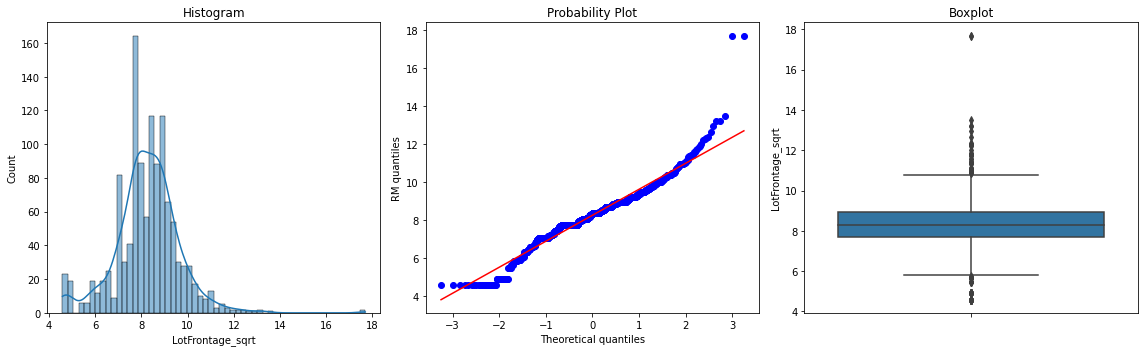

In [126]:
data["LotFrontage_sqrt"] = np.sqrt(data.LotFrontage)
diagnostic_plots(data, "LotFrontage_sqrt")

In [127]:
def get_outliers(data, var, factor = 1.5):
    lb = data[var].quantile(0.25)
    rb = data[var].quantile(0.75)
    iqr = rb-lb
    los = data[var][data[var] <= lb-factor*iqr]
    ros = data[var][data[var] >= rb+factor*iqr]
    return (los, ros)

In [128]:
def count_outliers(data, feats, factor = 3):
    left_count, right_count = [], []
    for var in feats:
        los, ros = get_outliers(data, var, factor)
        left_count.append(los.count())
        right_count.append(ros.count())
    return pd.DataFrame({"left outliers":  left_count,
                  "right outliers": right_count}, index = feats)
    

In [129]:
lotfronts = [v for v in data.columns.values if v.split('_')[0]=="LotFrontage"]
count_outliers(data, lotfronts, factor = 3)

,left outliers,right outliers
LotFrontage,0,12
LotFrontage_log,23,2
LotFrontage_logc,0,2
LotFrontage_bc,0,6
LotFrontage_yj,0,6
LotFrontage_sqrt,0,6


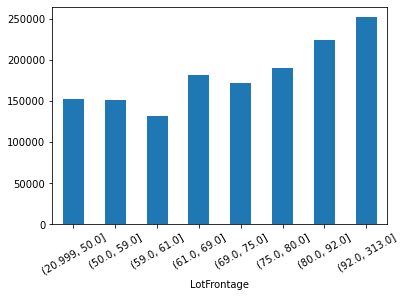

In [130]:
data.groupby(pd.qcut(data.LotFrontage, 8)).SalePrice.mean().plot.bar(rot=30);

In [131]:
data.drop(
    [v for v in data.columns.values if v.split('_')[0]=="LotFrontage" \
     and len(v.split('_'))>1],axis=1,inplace=True)

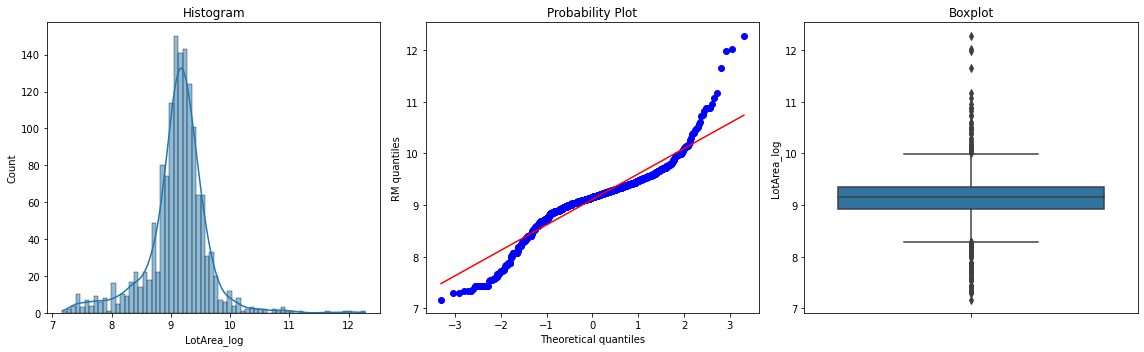

In [132]:
data["LotArea_log"] = np.log(data.LotArea)
diagnostic_plots(data, "LotArea_log")

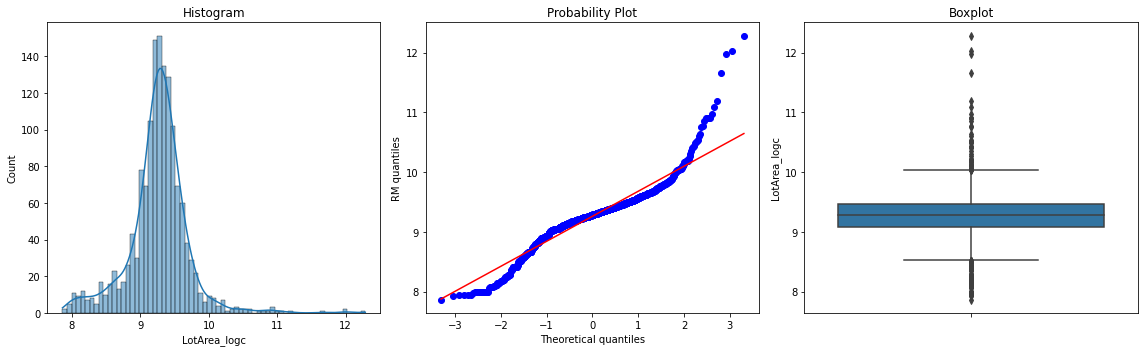

In [133]:
data["LotArea_logc"] = np.log(1+np.abs(data.LotArea.min()) + data.LotArea)
diagnostic_plots(data, "LotArea_logc")

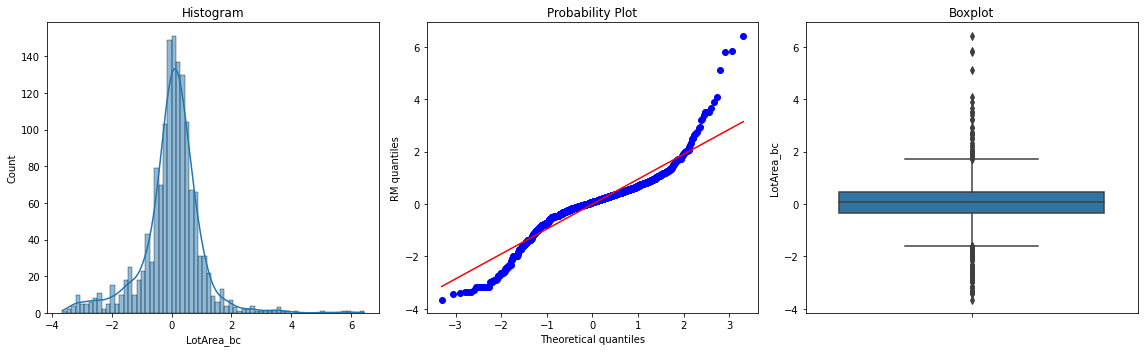

In [134]:
data["LotArea_bc"] = power_transform(data.LotArea.to_frame(), method='box-cox')
diagnostic_plots(data, "LotArea_bc")

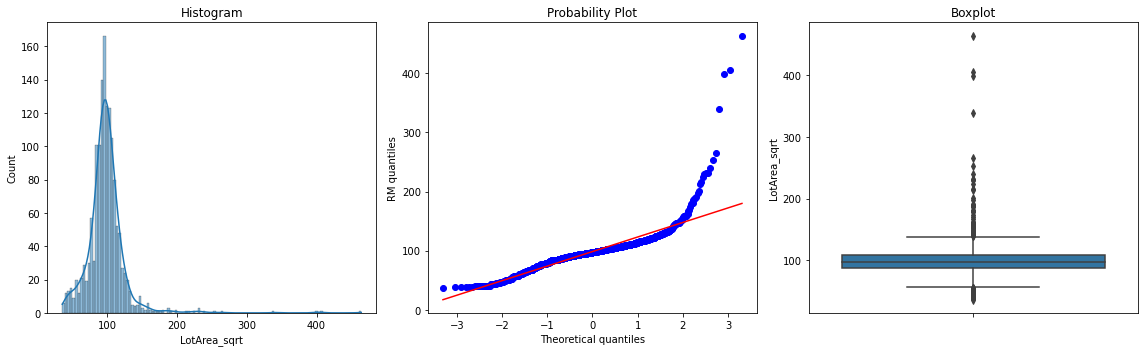

In [135]:
data["LotArea_sqrt"] = np.sqrt(data.LotArea)
diagnostic_plots(data, "LotArea_sqrt")

In [136]:
lotareas = [v for v in data.columns.values if v.split('_')[0] == "LotArea"]
count_outliers(data, lotareas, factor = 3)

,left outliers,right outliers
LotArea,0,34
LotArea_log,27,13
LotArea_logc,6,15
LotArea_bc,26,13
LotArea_sqrt,0,23


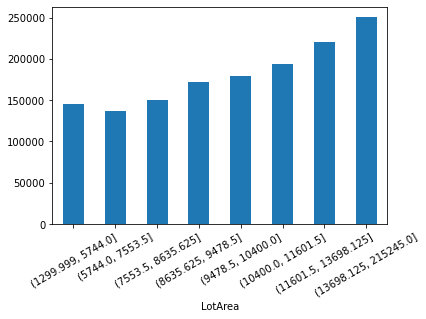

In [137]:
data.groupby(pd.qcut(data.LotArea, 8)).SalePrice.mean().plot.bar(rot=30);

In [138]:
data.drop([v for v in data.columns.values if v.split('_')[0]=="LotArea" \
     and len(v.split('_'))>1],axis=1,inplace=True)

In [139]:
data.MasVnrArea.describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [140]:
data[data.MasVnrArea>0].MasVnrArea.count()

591

In [141]:
data["MasVnrArea_pos"] = data.MasVnrArea.map(
    lambda x : np.NaN if x==0 else x)

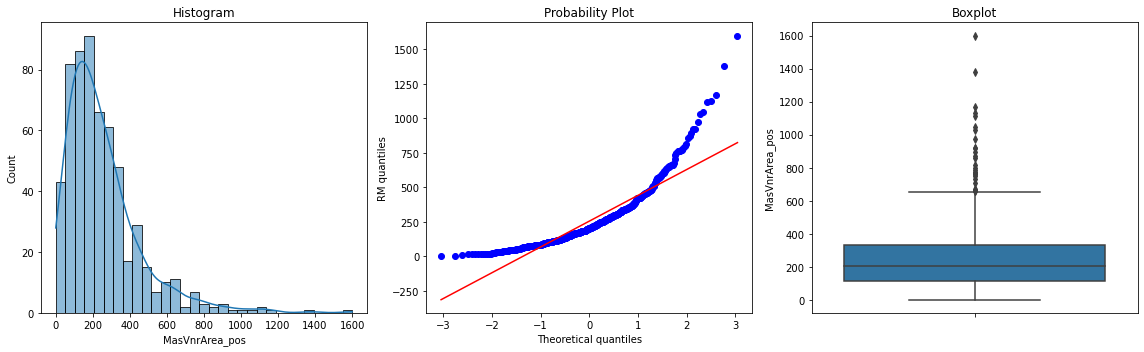

In [142]:
diagnostic_plots(data, "MasVnrArea_pos")

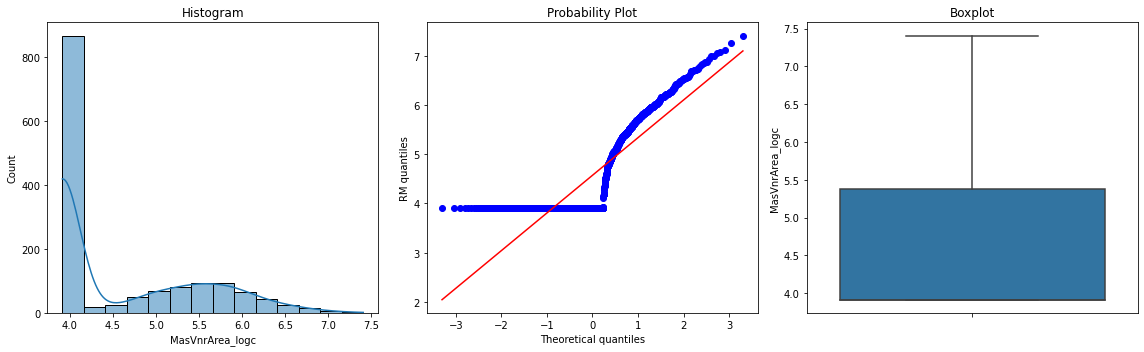

In [143]:
data["MasVnrArea_logc"] = np.log(50+data.MasVnrArea)
diagnostic_plots(data, "MasVnrArea_logc")

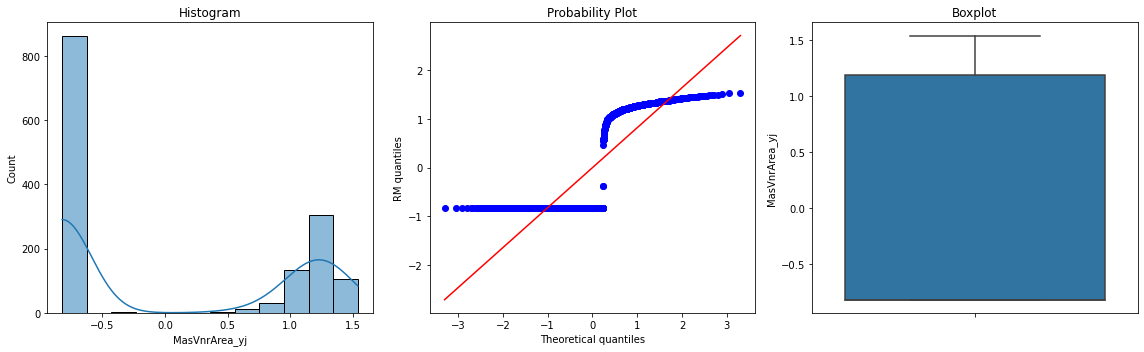

In [144]:
data["MasVnrArea_yj"] = power_transform(data.MasVnrArea.to_frame(), method='yeo-johnson')
diagnostic_plots(data, "MasVnrArea_yj")

In [145]:
masvnrareas = [var for var in data.columns.values if var.split('_')[0]=='MasVnrArea']
count_outliers(data, masvnrareas)

,left outliers,right outliers
MasVnrArea,0,26
MasVnrArea_pos,0,7
MasVnrArea_logc,0,0
MasVnrArea_yj,0,0


In [146]:
data.drop([var for var in data.columns.values if var.split('_')[0]=='MasVnrArea' and \
          len(var.split('_'))>1],axis=1,inplace=True)

In [147]:
data.BsmtFinSF1.describe()

count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
max      5644.000000
Name: BsmtFinSF1, dtype: float64

In [148]:
data[data.BsmtFinSF1==0].BsmtFinSF1.count()

467

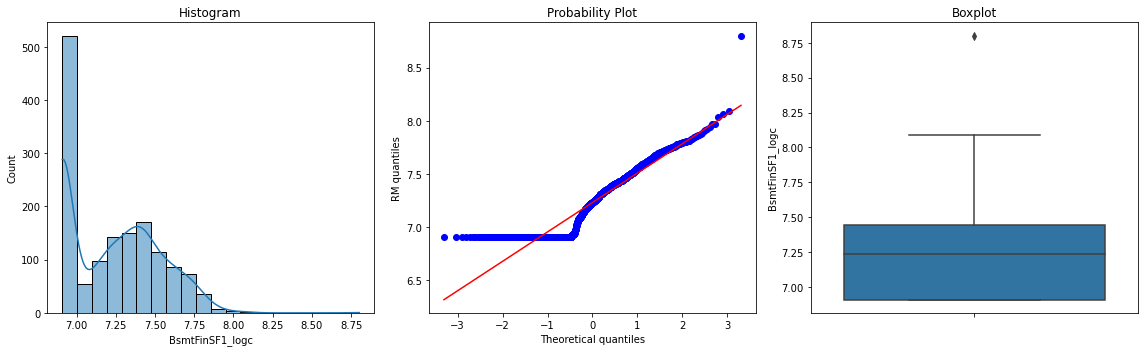

In [149]:
data["BsmtFinSF1_logc"] = np.log(1000+data.BsmtFinSF1)
diagnostic_plots(data, "BsmtFinSF1_logc")

In [150]:
bsmtfinsf1s = ["BsmtFinSF1", "BsmtFinSF1_logc"]
count_outliers(data, bsmtfinsf1s, factor=1.5)

,left outliers,right outliers
BsmtFinSF1,0,7
BsmtFinSF1_logc,0,1


In [151]:
data.drop("BsmtFinSF1_logc",axis=1,inplace=True)

In [152]:
data.BsmtFinSF2.describe()

count    1460.000000
mean       46.549315
std       161.319273
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64

In [153]:
data[data.BsmtFinSF2==0].BsmtFinSF2.count()

1293

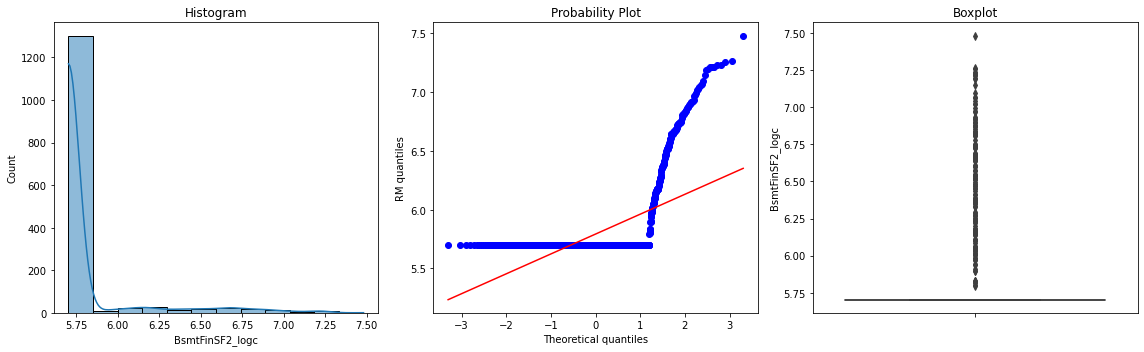

In [154]:
data["BsmtFinSF2_logc"] = np.log(300+data.BsmtFinSF2)
diagnostic_plots(data, "BsmtFinSF2_logc")

In [155]:
(data[data.BsmtFinSF2 > np.percentile(data.BsmtFinSF2, 99.99)].BsmtFinSF2.count(),
 data[data.BsmtFinSF2_logc > np.percentile(data.BsmtFinSF2_logc, 99.99)].BsmtFinSF2.count())
 

(1, 1)

In [156]:
data.drop("BsmtFinSF2_logc",axis=1,inplace=True)

In [157]:
data.BsmtUnfSF.describe()

count    1460.000000
mean      567.240411
std       441.866955
min         0.000000
25%       223.000000
50%       477.500000
75%       808.000000
max      2336.000000
Name: BsmtUnfSF, dtype: float64

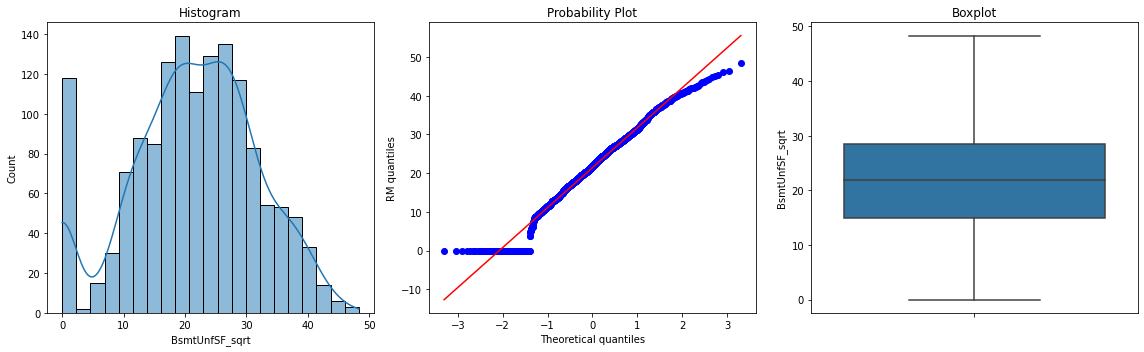

In [158]:
data["BsmtUnfSF_sqrt"] = np.sqrt(data.BsmtUnfSF)
diagnostic_plots(data, "BsmtUnfSF_sqrt")

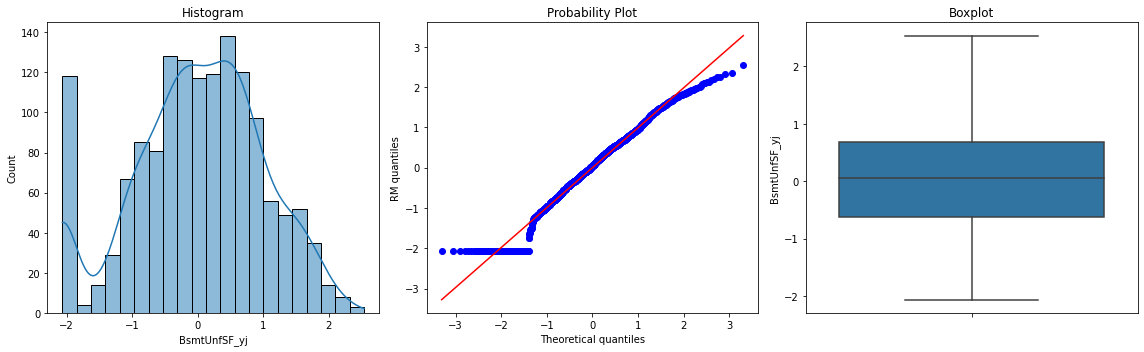

In [159]:
data["BsmtUnfSF_yj"] = power_transform(data.BsmtUnfSF.to_frame(), method='yeo-johnson')
diagnostic_plots(data, "BsmtUnfSF_yj")

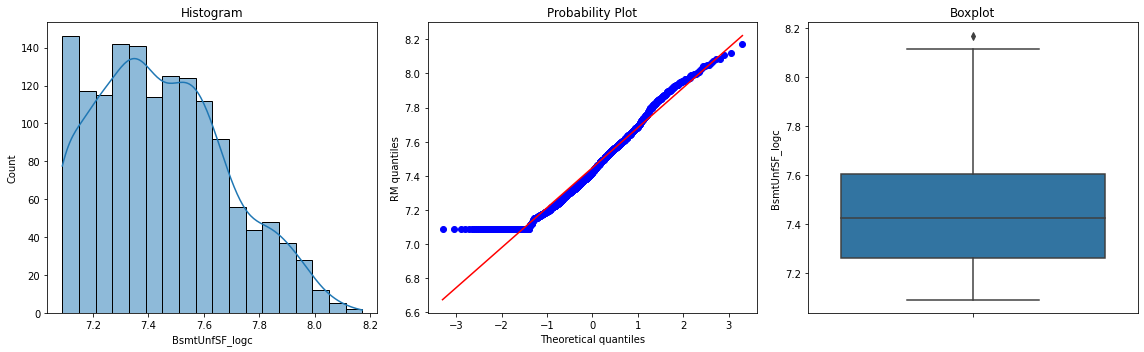

In [160]:
data["BsmtUnfSF_logc"] = np.log(1200+data.BsmtUnfSF)
diagnostic_plots(data, "BsmtUnfSF_logc")

In [161]:
bsmtunfsfs = [var for var in data.columns.values if var.split('_')[0]=='BsmtUnfSF']
count_outliers(data, bsmtunfsfs, factor = 1.5)

,left outliers,right outliers
BsmtUnfSF,0,29
BsmtUnfSF_sqrt,0,0
BsmtUnfSF_yj,0,0
BsmtUnfSF_logc,0,1


In [162]:
data.drop(
    [var for var in data.columns.values if var.split('_')[0]=='BsmtUnfSF' and len(var.split('_'))>1],axis=1,inplace=True)

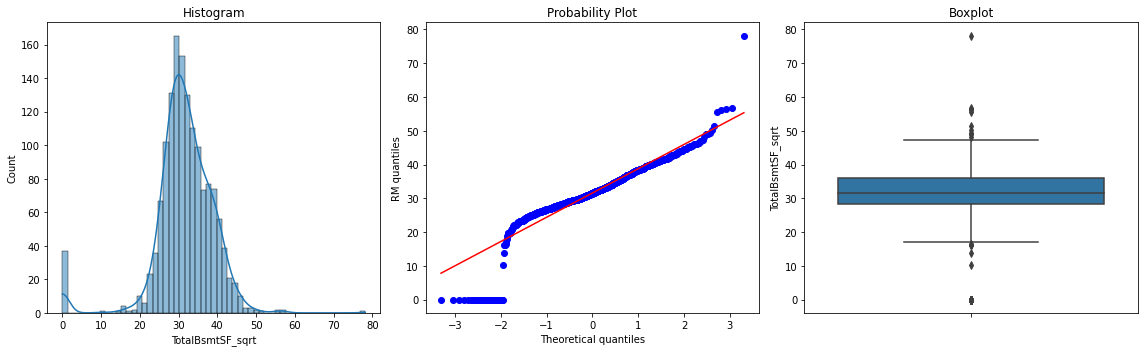

In [163]:
data["TotalBsmtSF_sqrt"] = np.sqrt(data.TotalBsmtSF)
diagnostic_plots(data, "TotalBsmtSF_sqrt")

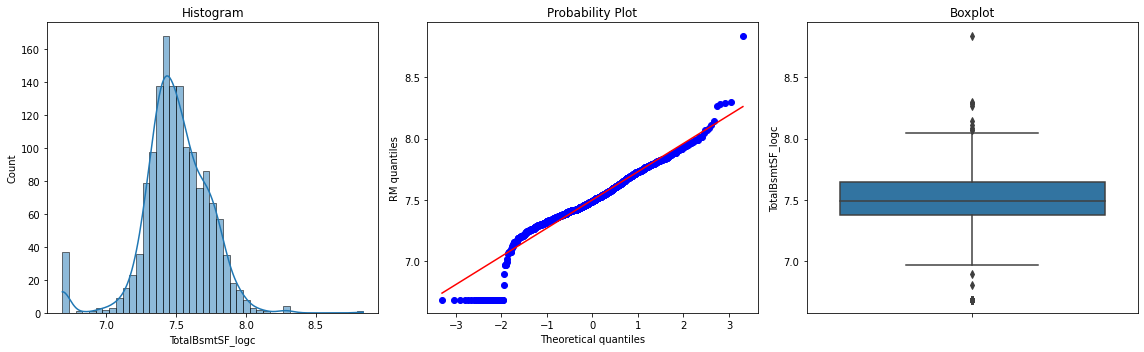

In [164]:
data["TotalBsmtSF_logc"] = np.log(800+data.TotalBsmtSF)
diagnostic_plots(data, "TotalBsmtSF_logc")

In [165]:
totalbsmtsfs = ["TotalBsmtSF", "TotalBsmtSF_logc", "TotalBsmtSF_sqrt"]
count_outliers(data, totalbsmtsfs)

,left outliers,right outliers
TotalBsmtSF,0,5
TotalBsmtSF_logc,0,1
TotalBsmtSF_sqrt,37,1


In [166]:
data.drop(["TotalBsmtSF_logc", "TotalBsmtSF_sqrt"], axis=1, inplace=True)

In [167]:
data["1stFlrSF"].describe()

count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64

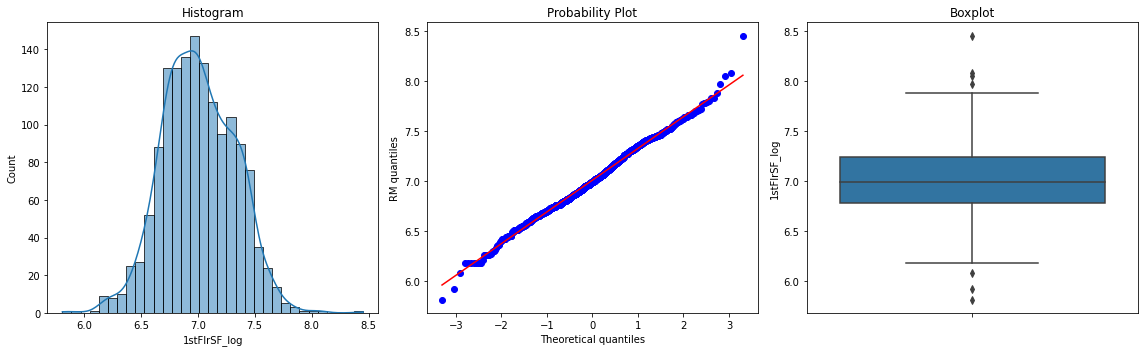

In [168]:
data["1stFlrSF_log"] = np.log(data["1stFlrSF"])
diagnostic_plots(data, "1stFlrSF_log")

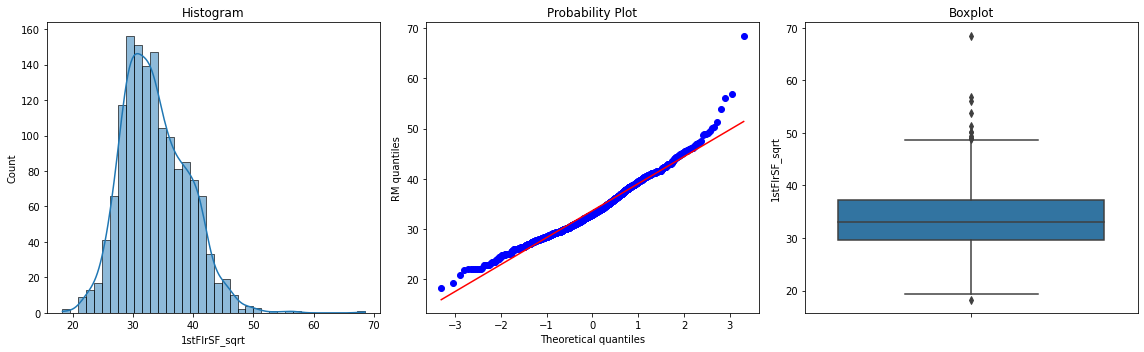

In [169]:
data["1stFlrSF_sqrt"] = np.sqrt(data["1stFlrSF"])
diagnostic_plots(data, "1stFlrSF_sqrt")

In [170]:
count_outliers(data, ["1stFlrSF", "1stFlrSF_log", "1stFlrSF_sqrt"], factor=1.5)

,left outliers,right outliers
1stFlrSF,0,20
1stFlrSF_log,3,4
1stFlrSF_sqrt,1,11


In [171]:
data.drop(["1stFlrSF_log", "1stFlrSF_sqrt"],axis=1,inplace=True)

In [172]:
data["2ndFlrSF"].describe()

count    1460.000000
mean      346.992466
std       436.528436
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64

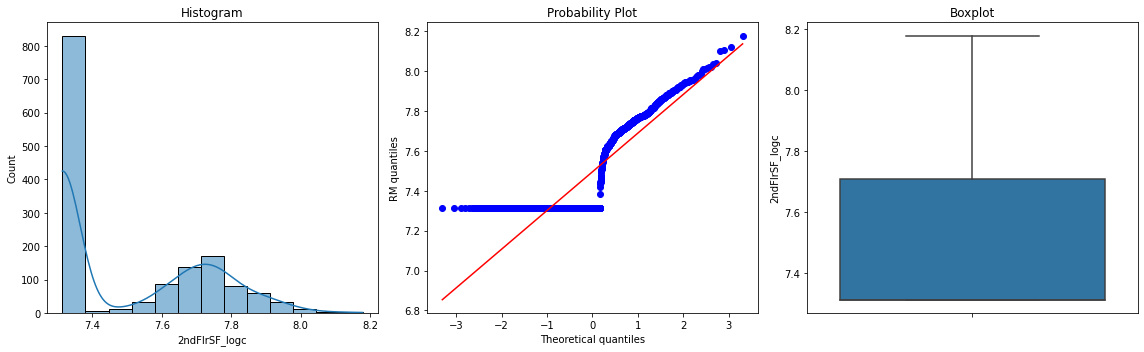

In [173]:
data["2ndFlrSF_logc"] = np.log(1500+data["2ndFlrSF"])
diagnostic_plots(data, "2ndFlrSF_logc")

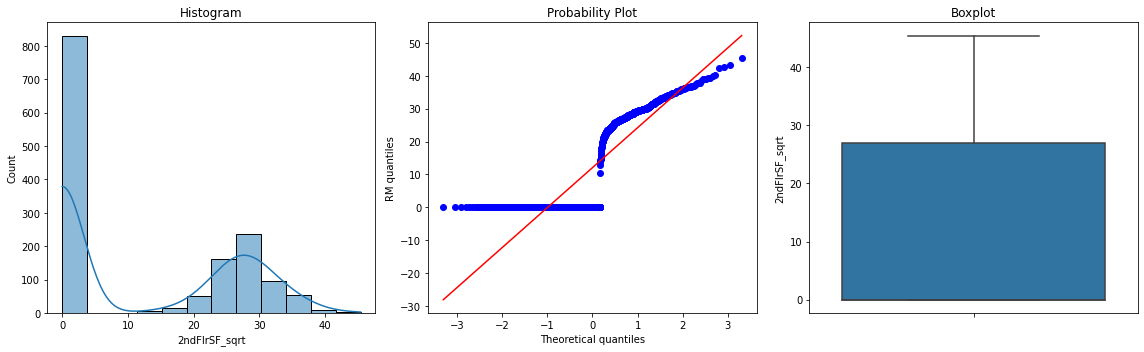

In [174]:
data["2ndFlrSF_sqrt"] = np.sqrt(data["2ndFlrSF"])
diagnostic_plots(data, "2ndFlrSF_sqrt")

In [175]:
count_outliers(data, ["2ndFlrSF", "2ndFlrSF_logc", "2ndFlrSF_sqrt"], factor = 1.5)

,left outliers,right outliers
2ndFlrSF,0,2
2ndFlrSF_logc,0,0
2ndFlrSF_sqrt,0,0


In [176]:
data.drop(["2ndFlrSF_logc", "2ndFlrSF_sqrt"],axis=1,inplace=True)

In [177]:
data.GrLivArea.describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

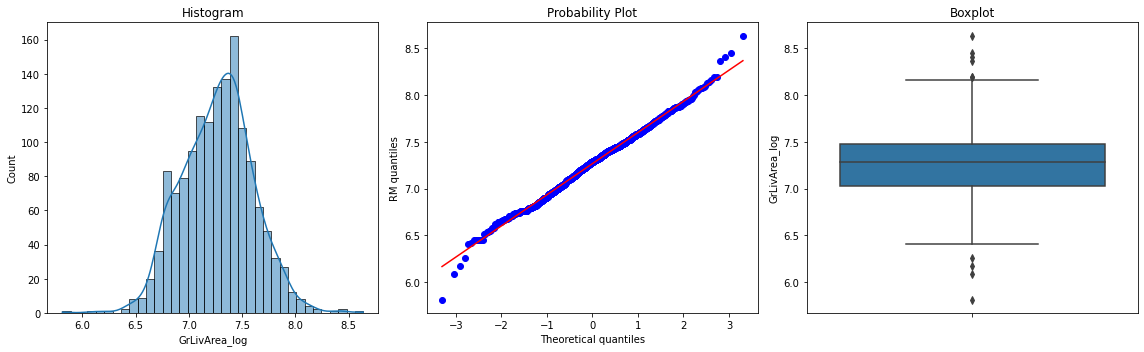

In [178]:
data["GrLivArea_log"] = np.log(data.GrLivArea)
diagnostic_plots(data,"GrLivArea_log")

In [179]:
count_outliers(data, ["GrLivArea", "GrLivArea_log"], factor = 1.5)

,left outliers,right outliers
GrLivArea,0,31
GrLivArea_log,4,6


In [180]:
data.drop("GrLivArea_log",axis=1,inplace=True)

In [181]:
data.GarageArea.describe()

count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64

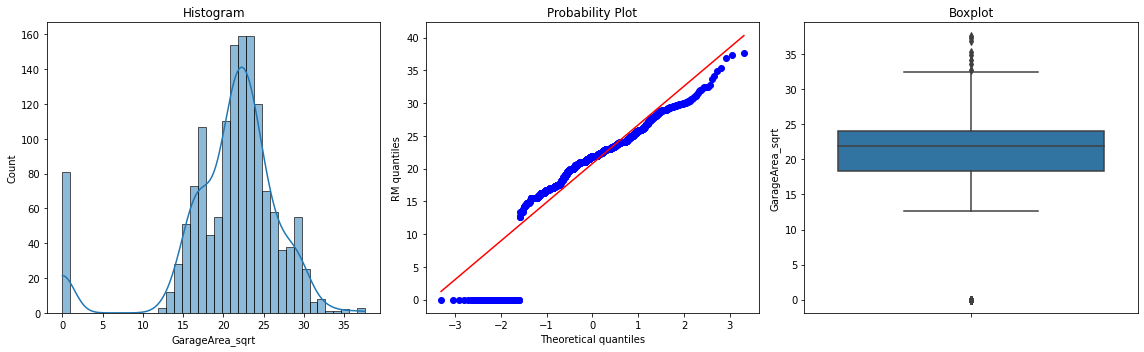

In [182]:
data["GarageArea_sqrt"] = np.sqrt(data.GarageArea)
diagnostic_plots(data, "GarageArea_sqrt")

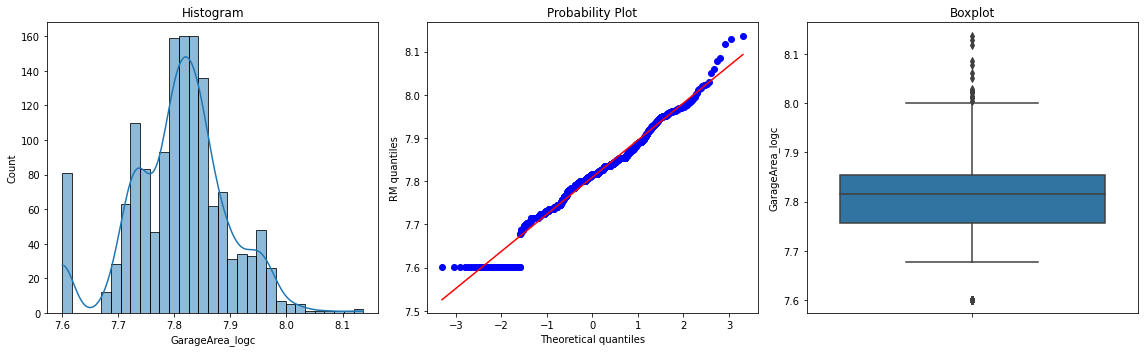

In [183]:
data["GarageArea_logc"] = np.log(2000+data.GarageArea)
diagnostic_plots(data, "GarageArea_logc")

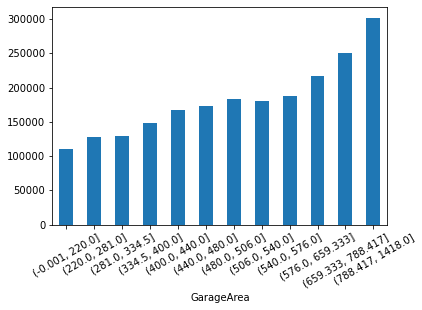

In [184]:
data.groupby(pd.qcut(data.GarageArea,12)).SalePrice.mean().plot.bar(rot=30);

In [185]:
count_outliers(data, ["GarageArea", "GarageArea_logc", "GarageArea_sqrt"])

,left outliers,right outliers
GarageArea,0,3
GarageArea_logc,0,0
GarageArea_sqrt,81,0


In [186]:
data.drop(["GarageArea_logc", "GarageArea_sqrt"], axis=1, inplace=True)

In [187]:
data.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

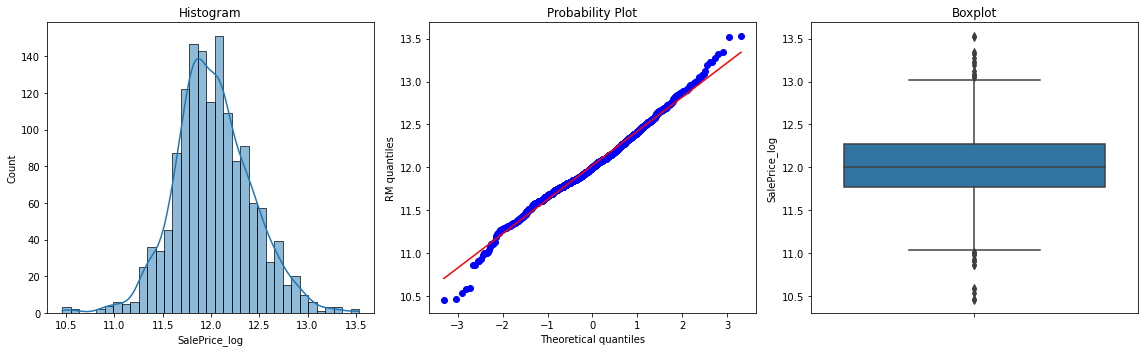

In [188]:
data["SalePrice_log"] = np.log(data.SalePrice)
diagnostic_plots(data, "SalePrice_log")

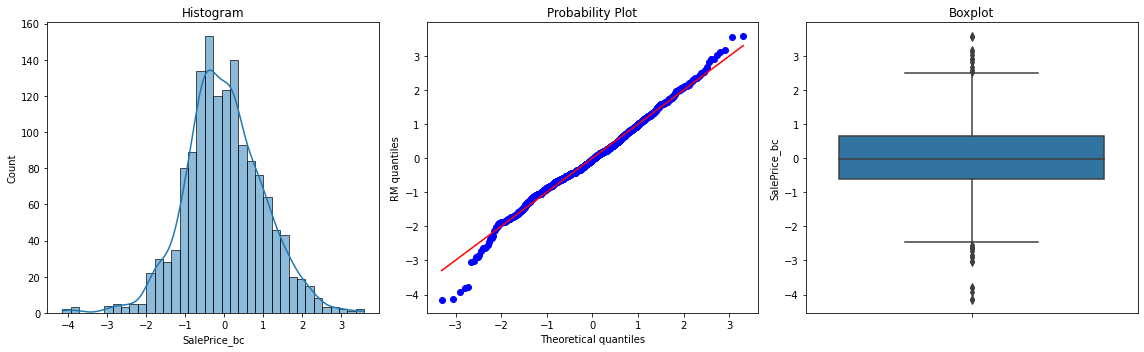

In [189]:
data["SalePrice_bc"] = power_transform(data.SalePrice.to_frame(), method = 'box-cox')
diagnostic_plots(data, "SalePrice_bc")

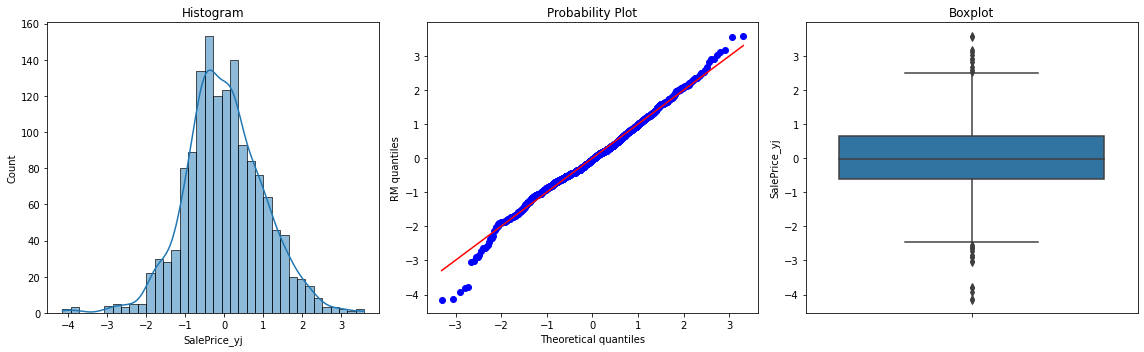

In [190]:
data["SalePrice_yj"] = power_transform(data.SalePrice.to_frame(), method='yeo-johnson')
diagnostic_plots(data, "SalePrice_yj")

In [191]:
count_outliers(data, ["SalePrice", "SalePrice_log", "SalePrice_bc", "SalePrice_yj"])

,left outliers,right outliers
SalePrice,0,12
SalePrice_log,0,0
SalePrice_bc,0,0
SalePrice_yj,0,0


In [192]:
data.drop(["SalePrice_log", "SalePrice_bc", "SalePrice_yj"],axis=1,inplace=True)

In [193]:
data.SalePrice = np.sqrt(data.SalePrice)

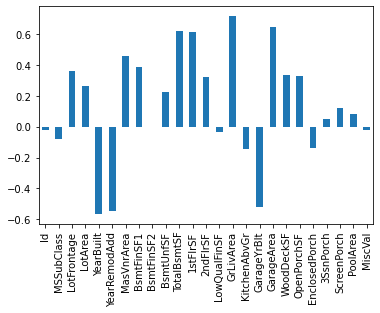

In [194]:
data.drop("SalePrice",axis=1).corrwith(data.SalePrice).plot.bar();

#### Numerical variables transforming/outliers handling strategy

- LotFrontage: distribution is skewed with a distinct peak on the very low end. It looks like a log transformation combined with a quantile outlier capping would mostly deal with said irregularity. Very low values don't seem to influence the price too much anyway
- LotArea: fantastically skewed distribution. Sqrt transform seems the best compromise, followed by quantile outlier capping that should deal well with most of the points on the right tail
- MasVnrArea: problematic feature because of the huge amount of zeros. We can make a portion of the distribution look gaussian-ish with a log(x+C) transformation but the peak at the minimum value is
- BsmtFinSF1: lots of zeros, see above. log(x+C) with a higher value now. Outlier capping with 1.5IQR boundaries
- BsmtFinSF2: bad feature, too many zeros. No transformation can even start fixing this distribution. Gonna use 99.99% percentile capping
- BsmtUnfSF: skewed distribution, many zeros. logc to make it gaussian for the most part, 1.5IQR follows
- TotalBsmtSF: sqrt transform, 3IQR outliers
- 1stFlrSF: log transform, 1.5IQR outliers
- 2ndFlrSF: too many zeros..logc transform
- GrLivArea: an *actual* distribution, smooth log transform and 1.5IQR
- GarageArea: logc transform, won't touch outliers as they seem to be indicative of higher value houses
- SalePrice: log transform results in perhaps too shrunk of a target range that causes the predictions to collapse on the mean value. We'll do sqrt transform

In [195]:
### Separate train and test set

In [196]:
# IMPORTANT: keep the random_state to zero for reproducibility
# Let's separate into train and test set

X_train, X_test, y_train, y_test = train_test_split(data.drop(
    ['Id', 'SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.1,
    random_state=0)

In [197]:
# capture the column names for use later in the notebook
final_columns = X_train.columns

In [198]:
## Feature Engineering Pipeline

In [199]:
# I will treat discrete variables as if they were categorical
# to treat discrete as categorical using Feature-engine
# we need to re-cast them as object

X_train[discrete] = X_train[discrete].astype('O')
X_test[discrete] = X_test[discrete].astype('O')

In [200]:
house_pipe = Pipeline([

    # missing data imputation
    ('missing_ind',
     mdi.AddMissingIndicator(
         variables=['BsmtQual', 'Fence', 'GarageType'])),
        
    ('random_imp',
     mdi.RandomSampleImputer(
         variables=['LotFrontage'],
         random_state = 0)),
    
    ('endtail_imp',
     mdi.EndTailImputer(
         variables=['GarageYrBlt'],
         imputation_method = 'max',
         tail='right')),
    
    ('median_imp',
    mdi.MeanMedianImputer(
        imputation_method='median',
         variables=['MasVnrArea'])),
    
    ('frequent_cat', mdi.CategoricalImputer(variables=categorical)),


    # categorical encoding - section 6
    ('rare_label_enc1',
     ce.RareLabelEncoder(
         tol=0.05, n_categories=1,
         variables=["MSSubClass", "KitchenAbvGr", "Alley",
                    "Street", "LandContour", "Utilities", "LandSlope",
                    "Condition1", "Condition2", "BldgType", "HouseStyle",
                    "RoofMatl", "BsmtCond", "BsmtFinType2", "Heating",
                    "Functional", "GarageQual", "GarageCond", "PoolQC",
                    "MiscFeature", "Fence"])),
    
    ('rare_label_enc2',
     ce.RareLabelEncoder(
         tol=0.07, n_categories=1,
         variables=["LotConfig", "Electrical"])),

    
    ('rare_label_enc3',
     ce.RareLabelEncoder(
         tol=0.11, n_categories=1,
         variables=["Foundation"])),
    
    #ordinal encoding based on saleprice
    ('categorical_enc',
     ce.OrdinalEncoder(variables=categorical + discrete)),

    #numerical variable transformation
    ('log_transformer',
     tr.LogTransformer(variables=["LotFrontage", "1stFlrSF", "GrLivArea"])),
    
    ('sqrt_transformer',
     tr.PowerTransformer(variables = ["LotArea", "TotalBsmtSF"], exp = 0.5)),
     
    ('logc_trasformer1',
     tr.LogCpTransformer(variables = ["MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "2ndFlrSF", "GarageArea"],
                         C = {"MasVnrArea": 50, "BsmtFinSF1": 1000, "BsmtFinSF2": 300,
                              "BsmtUnfSF": 1200, "2ndFlrSF": 1500, "GarageArea": 2000})),
     
    #outlier handling
    ('IQR_winsorizer3',
     out.Winsorizer(variables = ["LotFrontage", "LotArea", "TotalBsmtSF"],
                    capping_method = 'iqr', fold = 3)),
     
    ('IQR_winsorizer1.5',
     out.Winsorizer(variables = ["BsmtFinSF1", "BsmtUnfSF", "1stFlrSF", "GrLivArea"],
                    capping_method = 'iqr', fold = 1.5)),
     
    ('quantile_winsorizer99.99',
     out.Winsorizer(variables = ["BsmtFinSF2"],
                    capping_method = 'quantiles', fold = 0.001)),
     
    
    # numerical variables discretisation          random_state=2909
    ('discretisation',
     dsc.DecisionTreeDiscretiser(random_state=2909, variables=numerical)),

    # feature Scaling
    ('scaler', StandardScaler()),

    # regression
    ('lasso', Lasso(random_state=0))
])

In [201]:
# let's fit the pipeline
house_pipe.fit(X_train, y_train)

# let's get the predictions
X_train_preds = house_pipe.predict(X_train)
X_test_preds = house_pipe.predict(X_test)

In [202]:
X_train_preds = X_train_preds **2
X_test_preds = X_test_preds **2
y_train = y_train**2
y_test = y_test**2

In [203]:
# check model performance:

print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds, squared=True)))
print('train rmse: {}'.format(mean_squared_error(y_train, X_train_preds, squared=False)))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds,squared=True)))
print('test rmse: {}'.format(mean_squared_error(y_test, X_test_preds, squared=False)))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))

train mse: 623733611.7940849
train rmse: 24974.65939295439
train r2: 0.9001040348101075

test mse: 773941141.7325511
test rmse: 27819.797658008785
test r2: 0.8873794880542745


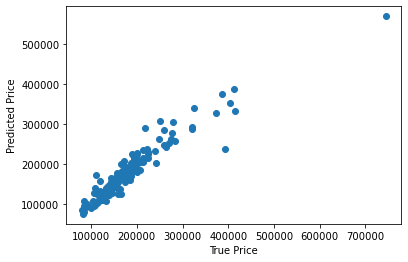

In [204]:
# plot predictions vs real value

plt.scatter(y_test,X_test_preds)
plt.xlabel('True Price')
plt.ylabel('Predicted Price');

<AxesSubplot:>

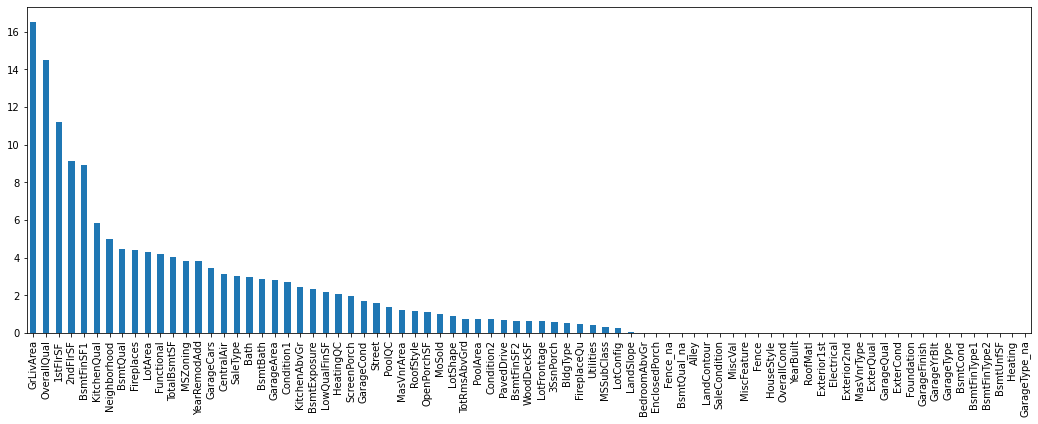

In [205]:
# let's explore the importance of the features
# the importance is given by the absolute value of the coefficient
# assigned by the Lasso

importance = pd.Series(np.abs(house_pipe.named_steps['lasso'].coef_))
importance.index = list(final_columns)+['BsmtQual_na', 'Fence_na',  'GarageType_na']
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))